In [1]:
pip install pycountry

In [2]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

from scipy import stats
from scipy.stats import norm
import statistics
import statsmodels.api as sm
import pylab as py

import plotly.express as px
import pycountry

pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [3]:
df = pd.read_csv("/content/gapminder.csv")
df.head()

,country,incomeperperson,alcconsumption,armedforcesrate,breastcancerper100th,co2emissions,femaleemployrate,hivrate,internetuserate,lifeexpectancy,oilperperson,polityscore,relectricperperson,suicideper100th,employrate,urbanrate
0,Afghanistan,,.03,.5696534,26.8,75944000,25.6000003814697,,3.65412162280064,48.673,,0,,6.68438529968262,55.7000007629394,24.04
1,Albania,1914.99655094922,7.29,1.0247361,57.4,223747333.333333,42.0999984741211,,44.9899469578783,76.918,,9,636.341383366604,7.69932985305786,51.4000015258789,46.72
2,Algeria,2231.99333515006,.69,2.306817,23.5,2932108666.66667,31.7000007629394,.1,12.5000733055148,73.131,.42009452521537,2,590.509814347428,4.8487696647644,50.5,65.22
3,Andorra,21943.3398976022,10.17,,,,,,81,,,,,5.36217880249023,,88.92
4,Angola,1381.00426770244,5.57,1.4613288,23.1,248358000,69.4000015258789,2,9.99995388324075,51.093,,-2,172.999227388199,14.5546770095825,75.6999969482422,56.7


## Data Exploration

In [4]:
df.shape

(213, 16)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   country               213 non-null    object
 1   incomeperperson       213 non-null    object
 2   alcconsumption        213 non-null    object
 3   armedforcesrate       213 non-null    object
 4   breastcancerper100th  213 non-null    object
 5   co2emissions          213 non-null    object
 6   femaleemployrate      213 non-null    object
 7   hivrate               213 non-null    object
 8   internetuserate       213 non-null    object
 9   lifeexpectancy        213 non-null    object
 10  oilperperson          213 non-null    object
 11  polityscore           213 non-null    object
 12  relectricperperson    213 non-null    object
 13  suicideper100th       213 non-null    object
 14  employrate            213 non-null    object
 15  urbanrate             213 non-null    ob

In [6]:
df.isnull().sum()

country                 0
incomeperperson         0
alcconsumption          0
armedforcesrate         0
breastcancerper100th    0
co2emissions            0
femaleemployrate        0
hivrate                 0
internetuserate         0
lifeexpectancy          0
oilperperson            0
polityscore             0
relectricperperson      0
suicideper100th         0
employrate              0
urbanrate               0
dtype: int64

In [7]:
df.dtypes

country                 object
incomeperperson         object
alcconsumption          object
armedforcesrate         object
breastcancerper100th    object
co2emissions            object
femaleemployrate        object
hivrate                 object
internetuserate         object
lifeexpectancy          object
oilperperson            object
polityscore             object
relectricperperson      object
suicideper100th         object
employrate              object
urbanrate               object
dtype: object

In [8]:
df.describe()

,country,incomeperperson,alcconsumption,armedforcesrate,breastcancerper100th,co2emissions,femaleemployrate,hivrate,internetuserate,lifeexpectancy,oilperperson,polityscore,relectricperperson,suicideper100th,employrate,urbanrate
count,213,213,213,213,213,213,213,213,213,213,213,213,213,213,213,213
unique,213,191,181,165,137,201,154,47,193,190,64,22,133,192,140,195
top,Afghanistan,,,,,,,,,,,,,,,
freq,1,23,26,49,40,13,35,66,21,22,150,52,77,22,35,10


## Outlier Analysis Function

In [9]:
#Tukey's method
def tukeys_method(df, variable):
    #Takes two parameters: dataframe & variable of interest as string
    q1 = df[variable].quantile(0.25)
    q3 = df[variable].quantile(0.75)
    iqr = q3-q1
    inner_fence = 1.5*iqr
    outer_fence = 3*iqr

    #inner fence lower and upper end
    inner_fence_le = q1-inner_fence
    inner_fence_ue = q3+inner_fence

    #outer fence lower and upper end
    outer_fence_le = q1-outer_fence
    outer_fence_ue = q3+outer_fence

    outliers_prob = []
    outliers_poss = []
    for index, x in enumerate(df[variable]):
        if x <= outer_fence_le or x >= outer_fence_ue:
            outliers_prob.append(index)
    for index, x in enumerate(df[variable]):
        if x <= inner_fence_le or x >= inner_fence_ue:
            outliers_poss.append(index)
    return outliers_prob, outliers_poss

### Feature Engineering: Country Feature

In [10]:
df.country.head(n = 20).unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin'],
      dtype=object)

In [11]:
countries_dict = {}
for country in pycountry.countries:
    countries_dict[country.name] = country.alpha_3

print(countries_dict)

{'Aruba': 'ABW', 'Afghanistan': 'AFG', 'Angola': 'AGO', 'Anguilla': 'AIA', 'Åland Islands': 'ALA', 'Albania': 'ALB', 'Andorra': 'AND', 'United Arab Emirates': 'ARE', 'Argentina': 'ARG', 'Armenia': 'ARM', 'American Samoa': 'ASM', 'Antarctica': 'ATA', 'French Southern Territories': 'ATF', 'Antigua and Barbuda': 'ATG', 'Australia': 'AUS', 'Austria': 'AUT', 'Azerbaijan': 'AZE', 'Burundi': 'BDI', 'Belgium': 'BEL', 'Benin': 'BEN', 'Bonaire, Sint Eustatius and Saba': 'BES', 'Burkina Faso': 'BFA', 'Bangladesh': 'BGD', 'Bulgaria': 'BGR', 'Bahrain': 'BHR', 'Bahamas': 'BHS', 'Bosnia and Herzegovina': 'BIH', 'Saint Barthélemy': 'BLM', 'Belarus': 'BLR', 'Belize': 'BLZ', 'Bermuda': 'BMU', 'Bolivia, Plurinational State of': 'BOL', 'Brazil': 'BRA', 'Barbados': 'BRB', 'Brunei Darussalam': 'BRN', 'Bhutan': 'BTN', 'Bouvet Island': 'BVT', 'Botswana': 'BWA', 'Central African Republic': 'CAF', 'Canada': 'CAN', 'Cocos (Keeling) Islands': 'CCK', 'Switzerland': 'CHE', 'Chile': 'CHL', 'China': 'CHN', "Côte d'Iv

In [12]:
df['countrycode'] = df['country']
df.head()

,country,incomeperperson,alcconsumption,armedforcesrate,breastcancerper100th,co2emissions,femaleemployrate,hivrate,internetuserate,lifeexpectancy,oilperperson,polityscore,relectricperperson,suicideper100th,employrate,urbanrate,countrycode
0,Afghanistan,,.03,.5696534,26.8,75944000,25.6000003814697,,3.65412162280064,48.673,,0,,6.68438529968262,55.7000007629394,24.04,Afghanistan
1,Albania,1914.99655094922,7.29,1.0247361,57.4,223747333.333333,42.0999984741211,,44.9899469578783,76.918,,9,636.341383366604,7.69932985305786,51.4000015258789,46.72,Albania
2,Algeria,2231.99333515006,.69,2.306817,23.5,2932108666.66667,31.7000007629394,.1,12.5000733055148,73.131,.42009452521537,2,590.509814347428,4.8487696647644,50.5,65.22,Algeria
3,Andorra,21943.3398976022,10.17,,,,,,81,,,,,5.36217880249023,,88.92,Andorra
4,Angola,1381.00426770244,5.57,1.4613288,23.1,248358000,69.4000015258789,2,9.99995388324075,51.093,,-2,172.999227388199,14.5546770095825,75.6999969482422,56.7,Angola


In [13]:
df['countrycode'] = df['countrycode'].apply(lambda x: countries_dict[x] if x in countries_dict else 'Not found' )

In [14]:
df['countrycode'] = ['AFG', 'ALB', 'DZA', 'AND', 'AGO', 'ATG', 'ARG', 'ARM', 'ABW', 'AUS', 'AUT',
                    'AZE', 'BHS', 'BHR', 'BGD', 'BRB', 'BLR', 'BEL', 'BLZ', 'BEN', 'BMU', 'BTN',
                    'BOL', 'BIH', 'BWA', 'BRA', 'BRN', 'BGR', 'BFA', 'BDI', 'KHM',
                    'CMR', 'CAN', 'CPV', 'CYM', 'CAF', 'TCD', 'CHL', 'CHN', 'COL',
                    'COM', 'COD', 'COG', 'COK', 'CRI', 'CIV', 'HRV',
                    'CUB', 'CYP', 'CZE', 'DNK', 'DJI', 'DMA', 'DOM', 'ECU', 'EGY',
                    'SLV', 'GNQ', 'ERI', 'EST', 'ETH', 'FRO', 'FJI', 'FIN', 'FRA', 'PYF',
                    'GAB', 'GMB', 'GEO', 'DEU', 'GHA', 'GIB', 'GRC', 'GRL', 'GRD', 'GLP', 'GUM',
                    'GTM', 'GIN', 'GNB', 'GUY', 'HTI', 'HND', 'HKG', 'HUN', 'ISL', 'IND',
                    'IDN', 'IRN', 'IRQ', 'IRL', 'ISR', 'ITA', 'JAM', 'JPN', 'JOR', 'KAZ',
                    'KEN', 'KIR', 'PRK', 'KOR', 'KWT', 'KGZ', 'LAO',
                    'LVA', 'LBN', 'LSO', 'LBR', 'LBY', 'LIE', 'LTU', 'LUX', 'MAC',
                    'MKD', 'MDG', 'MWI', 'MYS', 'MDV', 'MLI', 'MLT', 'MHL', 'MTQ', 'MRT',
                    'MUS', 'MEX', 'FSM', 'MDA', 'MCO', 'MNG', 'MNE', 'MAR', 'MOZ',
                    'MMR', 'NAM', 'NRU', 'NPL', 'NLD', 'ANT', 'NCL', 'NZL', 'NIC', 'NER',
                    'NGA', 'NIU', 'NOR', 'OMN', 'PAK', 'PLW', 'PAN', 'PNG', 'PRY', 'PER', 'PHL',
                    'POL', 'PRT', 'PRI', 'QAT', 'REU', 'ROU', 'RUS', 'RWA',
                    'KNA', 'LCA', 'VCT', 'WSM', 'SMR', 'STP', 'SAU', 'SEN', 'SRB', 'SCG',
                    'SYC', 'SLE', 'SGP', 'SVK', 'SVN', 'SLB', 'SOM', 'ZAF', 'ESP', 'LKA',
                    'SDN', 'SUR', 'SWZ', 'SWE', 'CHE', 'SYR', 'TWN',
                    'TJK', 'TZA', 'THA', 'TLS', 'TGO', 'TON', 'TTO', 'TUN', 'TUR', 'TKM',
                    'TUV', 'UGA', 'UKR', 'ARE', 'GBR', 'USA', 'URY', 'UZB', 'VUT', 'VEN',
                    'VNM', 'PSE', 'YEM', 'ZMB', 'ZWE']

In [15]:
df.head()

,country,incomeperperson,alcconsumption,armedforcesrate,breastcancerper100th,co2emissions,femaleemployrate,hivrate,internetuserate,lifeexpectancy,oilperperson,polityscore,relectricperperson,suicideper100th,employrate,urbanrate,countrycode
0,Afghanistan,,.03,.5696534,26.8,75944000,25.6000003814697,,3.65412162280064,48.673,,0,,6.68438529968262,55.7000007629394,24.04,AFG
1,Albania,1914.99655094922,7.29,1.0247361,57.4,223747333.333333,42.0999984741211,,44.9899469578783,76.918,,9,636.341383366604,7.69932985305786,51.4000015258789,46.72,ALB
2,Algeria,2231.99333515006,.69,2.306817,23.5,2932108666.66667,31.7000007629394,.1,12.5000733055148,73.131,.42009452521537,2,590.509814347428,4.8487696647644,50.5,65.22,DZA
3,Andorra,21943.3398976022,10.17,,,,,,81,,,,,5.36217880249023,,88.92,AND
4,Angola,1381.00426770244,5.57,1.4613288,23.1,248358000,69.4000015258789,2,9.99995388324075,51.093,,-2,172.999227388199,14.5546770095825,75.6999969482422,56.7,AGO


## Modifying Data Types

In [16]:
for col in df.iloc[:,1:-1].columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')
    df[col] = df[col].astype(float)

In [17]:
df.head()

,country,incomeperperson,alcconsumption,armedforcesrate,breastcancerper100th,co2emissions,femaleemployrate,hivrate,internetuserate,lifeexpectancy,oilperperson,polityscore,relectricperperson,suicideper100th,employrate,urbanrate,countrycode
0,Afghanistan,NaN,0.030,0.570,26.800,75944000.000,25.600,NaN,3.654,48.673,NaN,0.000,NaN,6.684,55.700,24.040,AFG
1,Albania,1914.997,7.290,1.025,57.400,223747333.333,42.100,NaN,44.990,76.918,NaN,9.000,636.341,7.699,51.400,46.720,ALB
2,Algeria,2231.993,0.690,2.307,23.500,2932108666.667,31.700,0.100,12.500,73.131,0.420,2.000,590.510,4.849,50.500,65.220,DZA
3,Andorra,21943.340,10.170,NaN,NaN,NaN,NaN,NaN,81.000,NaN,NaN,NaN,NaN,5.362,NaN,88.920,AND
4,Angola,1381.004,5.570,1.461,23.100,248358000.000,69.400,2.000,10.000,51.093,NaN,-2.000,172.999,14.555,75.700,56.700,AGO


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   country               213 non-null    object 
 1   incomeperperson       190 non-null    float64
 2   alcconsumption        187 non-null    float64
 3   armedforcesrate       164 non-null    float64
 4   breastcancerper100th  173 non-null    float64
 5   co2emissions          200 non-null    float64
 6   femaleemployrate      178 non-null    float64
 7   hivrate               147 non-null    float64
 8   internetuserate       192 non-null    float64
 9   lifeexpectancy        191 non-null    float64
 10  oilperperson          63 non-null     float64
 11  polityscore           161 non-null    float64
 12  relectricperperson    136 non-null    float64
 13  suicideper100th       191 non-null    float64
 14  employrate            178 non-null    float64
 15  urbanrate             2

## Qualitative and Quantitative Data

In [19]:
df_quant = df[["incomeperperson", "alcconsumption", "armedforcesrate", "breastcancerper100th", "co2emissions", "femaleemployrate",
                "hivrate", "internetuserate", "lifeexpectancy", "oilperperson", "polityscore", "relectricperperson", "suicideper100th",
                "employrate", "urbanrate"]]
df_qual = df[["country", "countrycode"]]

In [20]:
df_quant.head()

,incomeperperson,alcconsumption,armedforcesrate,breastcancerper100th,co2emissions,femaleemployrate,hivrate,internetuserate,lifeexpectancy,oilperperson,polityscore,relectricperperson,suicideper100th,employrate,urbanrate
0,NaN,0.030,0.570,26.800,75944000.000,25.600,NaN,3.654,48.673,NaN,0.000,NaN,6.684,55.700,24.040
1,1914.997,7.290,1.025,57.400,223747333.333,42.100,NaN,44.990,76.918,NaN,9.000,636.341,7.699,51.400,46.720
2,2231.993,0.690,2.307,23.500,2932108666.667,31.700,0.100,12.500,73.131,0.420,2.000,590.510,4.849,50.500,65.220
3,21943.340,10.170,NaN,NaN,NaN,NaN,NaN,81.000,NaN,NaN,NaN,NaN,5.362,NaN,88.920
4,1381.004,5.570,1.461,23.100,248358000.000,69.400,2.000,10.000,51.093,NaN,-2.000,172.999,14.555,75.700,56.700


In [21]:
df_qual.head()

,country,countrycode
0,Afghanistan,AFG
1,Albania,ALB
2,Algeria,DZA
3,Andorra,AND
4,Angola,AGO


In [22]:
df_quant.describe()

,incomeperperson,alcconsumption,armedforcesrate,breastcancerper100th,co2emissions,femaleemployrate,hivrate,internetuserate,lifeexpectancy,oilperperson,polityscore,relectricperperson,suicideper100th,employrate,urbanrate
count,190.000,187.000,164.000,173.000,200.000,178.000,147.000,192.000,191.000,63.000,161.000,136.000,191.000,178.000,203.000
mean,8740.966,6.689,1.444,37.403,5033261621.667,47.549,1.935,35.633,69.754,1.484,3.689,1173.179,9.641,58.636,56.769
std,14262.809,4.900,1.709,22.698,25738118429.893,14.626,4.377,27.780,9.709,1.825,6.315,1681.440,6.300,10.519,23.845
min,103.776,0.030,0.000,3.900,132000.000,11.300,0.060,0.210,47.794,0.032,-10.000,0.000,0.201,32.000,10.400
25%,748.245,2.625,0.481,20.600,34846166.667,38.725,0.100,10.000,64.447,0.533,-2.000,203.652,4.988,51.225,36.830
50%,2553.496,5.920,0.931,30.000,185901833.333,47.550,0.400,31.810,73.131,1.032,6.000,597.136,8.263,58.700,57.940
75%,9379.891,9.925,1.611,50.300,1846084166.667,55.875,1.300,56.416,76.593,1.623,9.000,1491.145,12.329,64.975,74.210
max,105147.438,23.010,10.639,101.100,334220872333.333,83.300,25.900,95.638,83.394,12.229,10.000,11154.755,35.753,83.200,100.000


In [23]:
df_qual.describe()

,country,countrycode
count,213,213
unique,213,213
top,Afghanistan,AFG
freq,1,1


## Missing Values Engineering

In [24]:
df_quant.isnull().sum()

incomeperperson          23
alcconsumption           26
armedforcesrate          49
breastcancerper100th     40
co2emissions             13
femaleemployrate         35
hivrate                  66
internetuserate          21
lifeexpectancy           22
oilperperson            150
polityscore              52
relectricperperson       77
suicideper100th          22
employrate               35
urbanrate                10
dtype: int64

<Axes: >

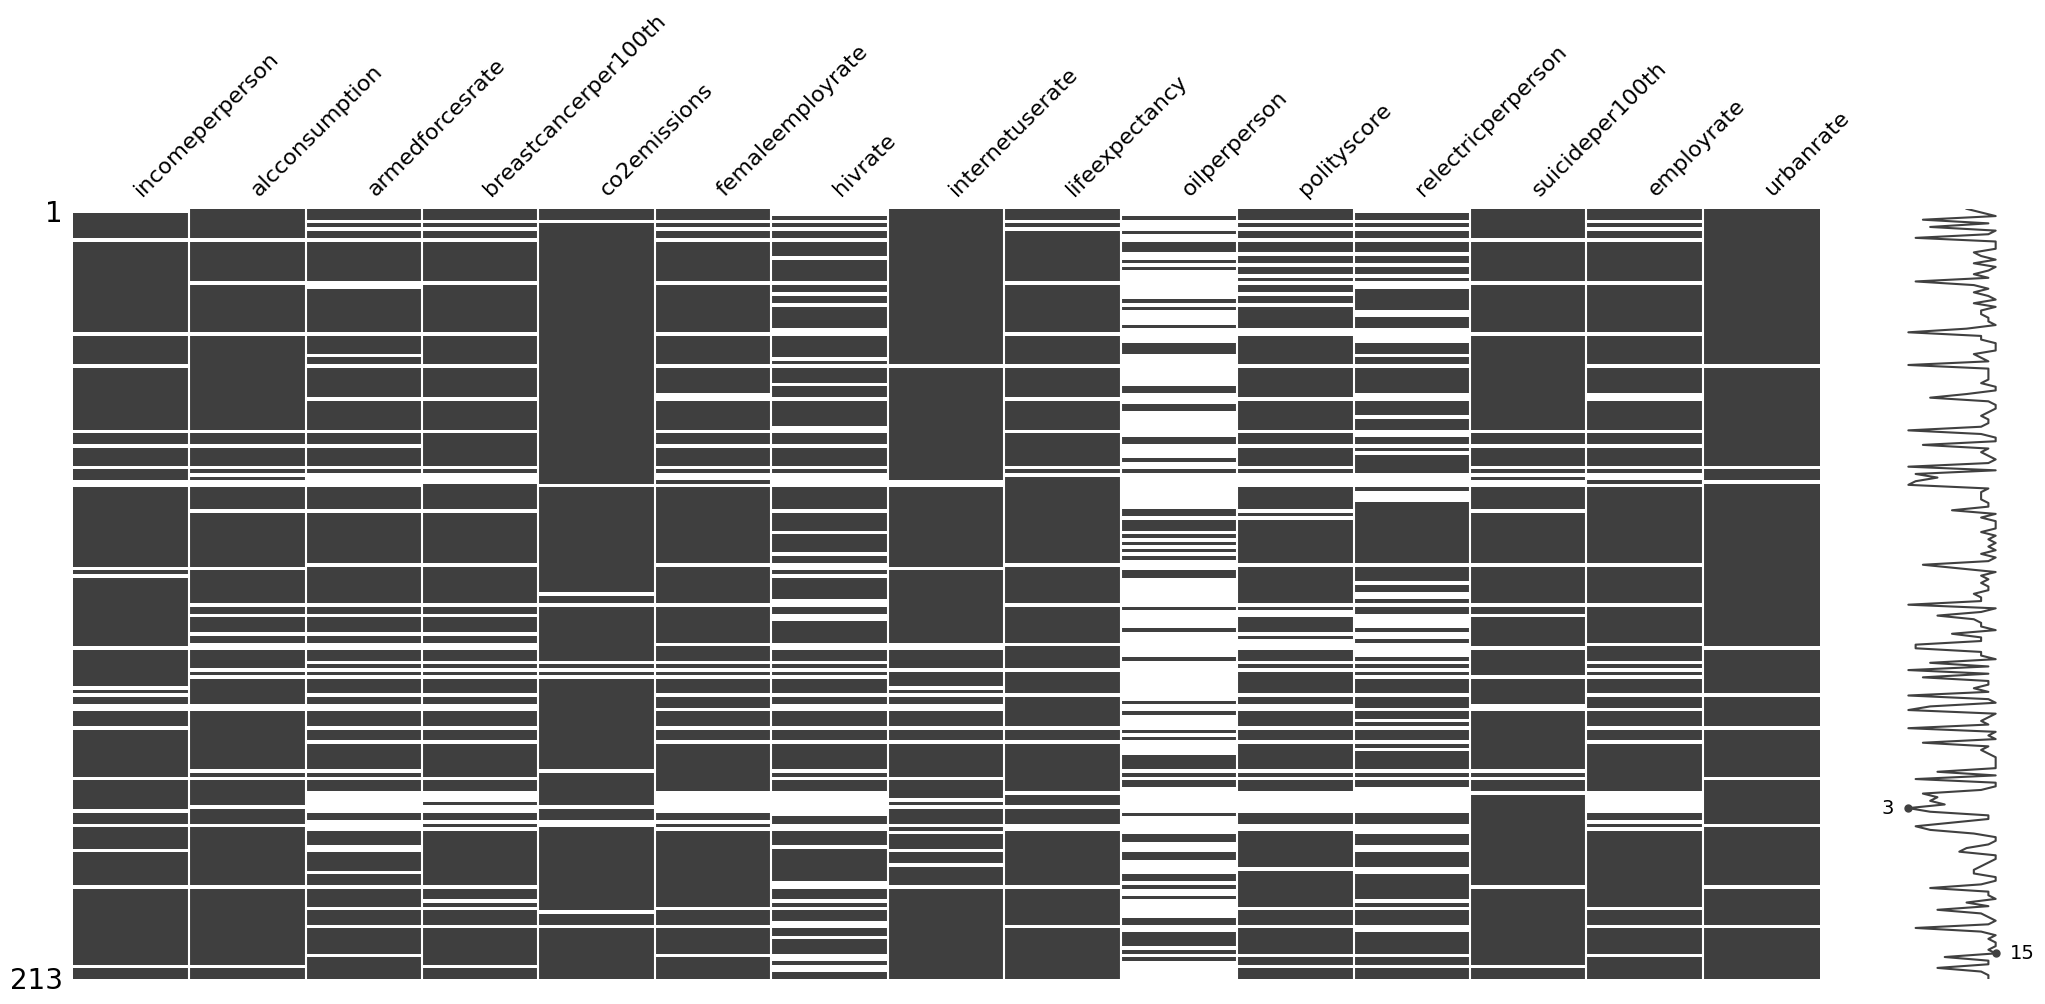

In [25]:
msno.matrix(df_quant)

In [26]:
df_qual.isnull().sum()

country        0
countrycode    0
dtype: int64

In [27]:
df_quant = df_quant.fillna(df_quant.mean())

In [28]:
df_quant.isnull().sum()

incomeperperson         0
alcconsumption          0
armedforcesrate         0
breastcancerper100th    0
co2emissions            0
femaleemployrate        0
hivrate                 0
internetuserate         0
lifeexpectancy          0
oilperperson            0
polityscore             0
relectricperperson      0
suicideper100th         0
employrate              0
urbanrate               0
dtype: int64

In [29]:
df.head()

,country,incomeperperson,alcconsumption,armedforcesrate,breastcancerper100th,co2emissions,femaleemployrate,hivrate,internetuserate,lifeexpectancy,oilperperson,polityscore,relectricperperson,suicideper100th,employrate,urbanrate,countrycode
0,Afghanistan,NaN,0.030,0.570,26.800,75944000.000,25.600,NaN,3.654,48.673,NaN,0.000,NaN,6.684,55.700,24.040,AFG
1,Albania,1914.997,7.290,1.025,57.400,223747333.333,42.100,NaN,44.990,76.918,NaN,9.000,636.341,7.699,51.400,46.720,ALB
2,Algeria,2231.993,0.690,2.307,23.500,2932108666.667,31.700,0.100,12.500,73.131,0.420,2.000,590.510,4.849,50.500,65.220,DZA
3,Andorra,21943.340,10.170,NaN,NaN,NaN,NaN,NaN,81.000,NaN,NaN,NaN,NaN,5.362,NaN,88.920,AND
4,Angola,1381.004,5.570,1.461,23.100,248358000.000,69.400,2.000,10.000,51.093,NaN,-2.000,172.999,14.555,75.700,56.700,AGO


In [30]:
df_quant.head()

,incomeperperson,alcconsumption,armedforcesrate,breastcancerper100th,co2emissions,femaleemployrate,hivrate,internetuserate,lifeexpectancy,oilperperson,polityscore,relectricperperson,suicideper100th,employrate,urbanrate
0,8740.966,0.030,0.570,26.800,75944000.000,25.600,1.935,3.654,48.673,1.484,0.000,1173.179,6.684,55.700,24.040
1,1914.997,7.290,1.025,57.400,223747333.333,42.100,1.935,44.990,76.918,1.484,9.000,636.341,7.699,51.400,46.720
2,2231.993,0.690,2.307,23.500,2932108666.667,31.700,0.100,12.500,73.131,0.420,2.000,590.510,4.849,50.500,65.220
3,21943.340,10.170,1.444,37.403,5033261621.667,47.549,1.935,81.000,69.754,1.484,3.689,1173.179,5.362,58.636,88.920
4,1381.004,5.570,1.461,23.100,248358000.000,69.400,2.000,10.000,51.093,1.484,-2.000,172.999,14.555,75.700,56.700


In [31]:
df_qual.head()

,country,countrycode
0,Afghanistan,AFG
1,Albania,ALB
2,Algeria,DZA
3,Andorra,AND
4,Angola,AGO


### Checking Outliers

In [32]:
for col in df_quant.columns:
  print(col, tukeys_method(df_quant, col))

incomeperperson ([20, 83, 85, 94, 109, 111, 112, 127, 144, 156, 173, 184, 185, 203], [3, 9, 10, 17, 20, 32, 50, 63, 64, 69, 73, 83, 85, 90, 91, 94, 109, 111, 112, 127, 136, 144, 156, 165, 173, 184, 185, 201, 202, 203])
alcconsumption ([], [100, 126])
armedforcesrate ([13, 26, 58, 89, 91, 95, 99, 103, 105, 145, 173, 186, 209], [13, 16, 26, 51, 55, 58, 72, 89, 91, 95, 99, 100, 103, 105, 108, 145, 173, 186, 209])
breastcancerper100th ([], [9, 17, 32, 50, 63, 64, 69, 85, 91, 111, 119, 136, 139, 184, 185, 202, 203, 204])
co2emissions ([9, 17, 25, 32, 38, 64, 69, 86, 92, 94, 100, 124, 153, 159, 178, 179, 202, 203], [9, 17, 25, 32, 38, 64, 69, 86, 87, 88, 92, 94, 100, 124, 136, 153, 158, 159, 167, 178, 179, 202, 203])
femaleemployrate ([], [28, 29, 55, 78, 89, 95, 103, 114, 131, 146, 160, 167, 186, 189, 199, 209, 210])
hivrate ([24, 106, 115, 131, 133, 178, 183, 211, 212], [24, 31, 35, 57, 66, 97, 106, 115, 131, 133, 178, 183, 189, 199, 211, 212])
internetuserate ([], [])
lifeexpectancy ([], 

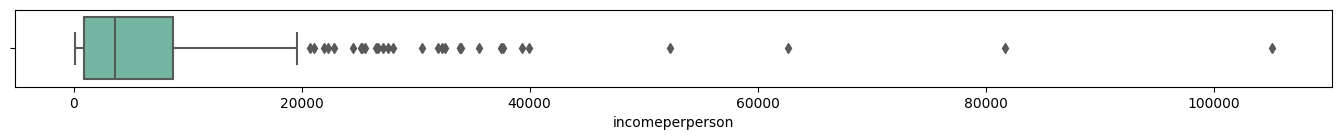

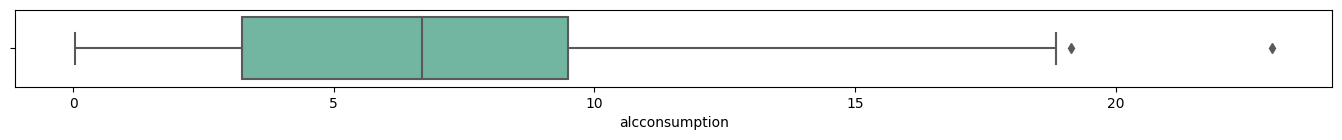

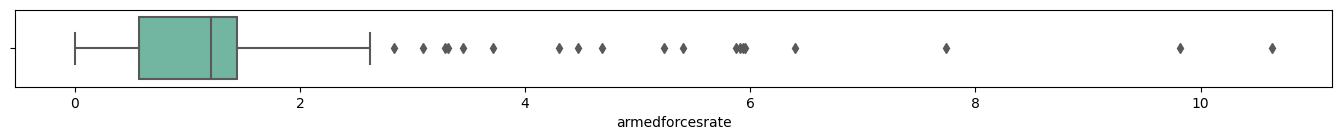

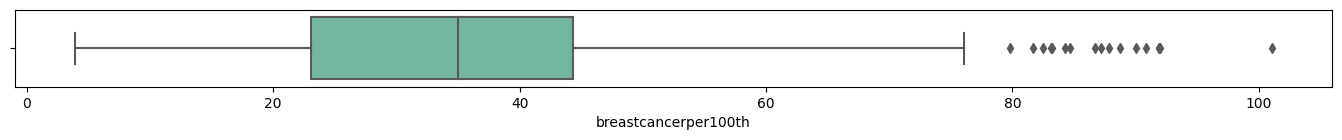

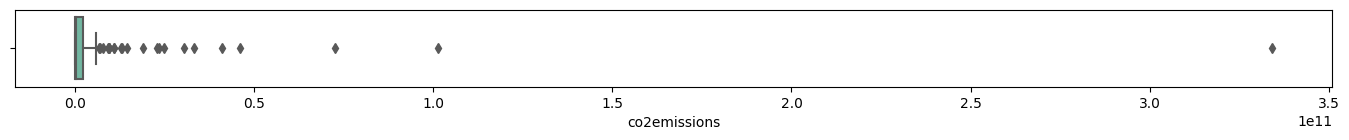

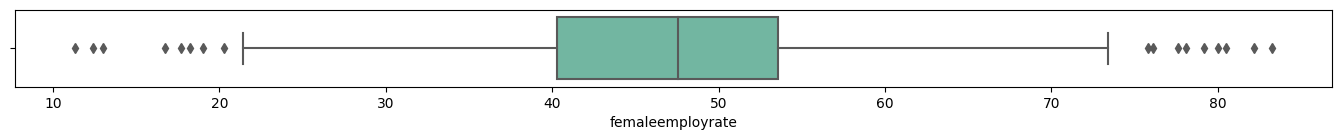

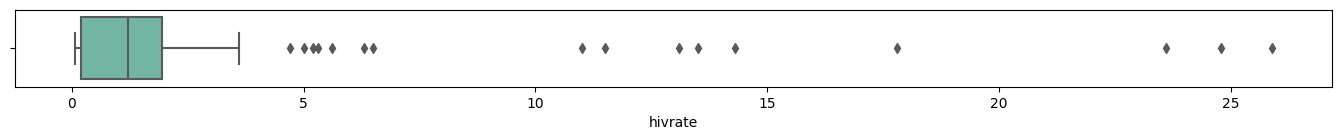

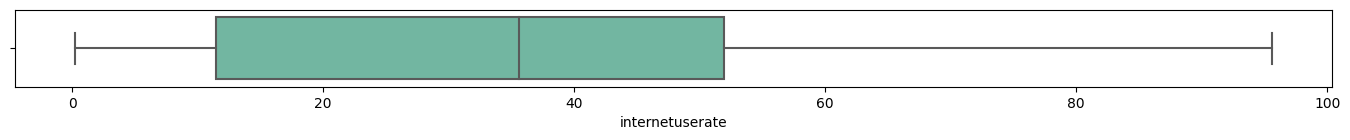

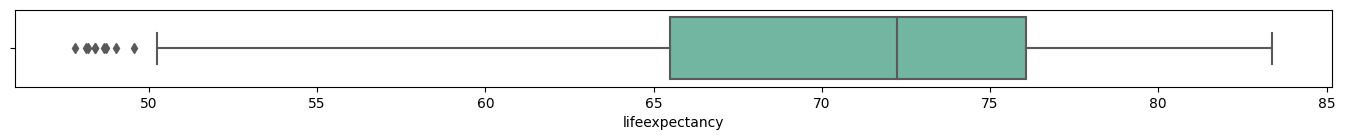

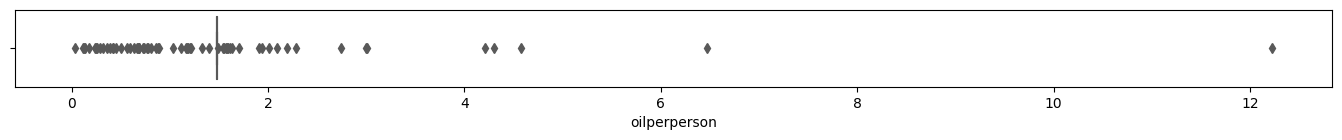

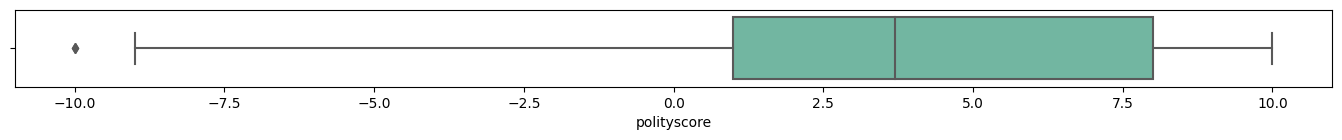

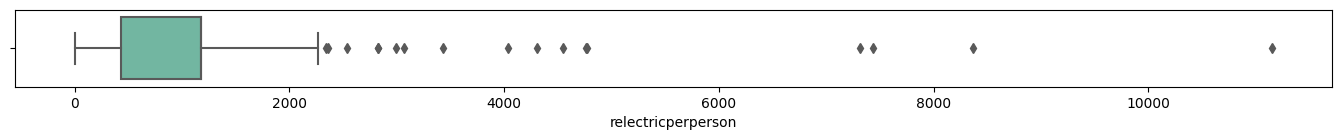

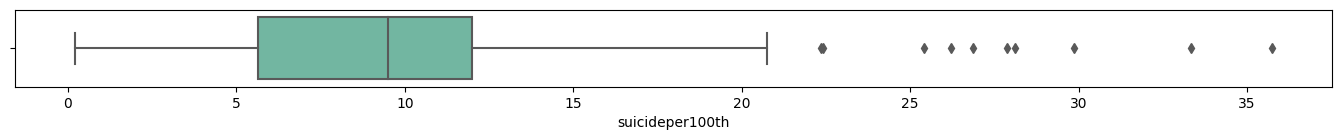

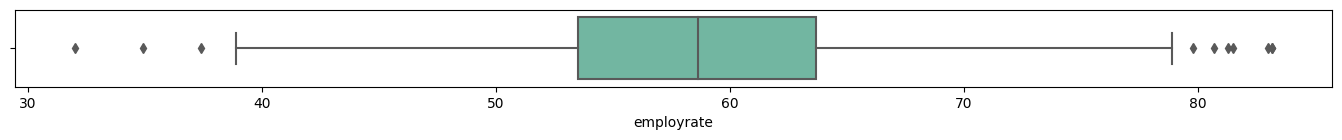

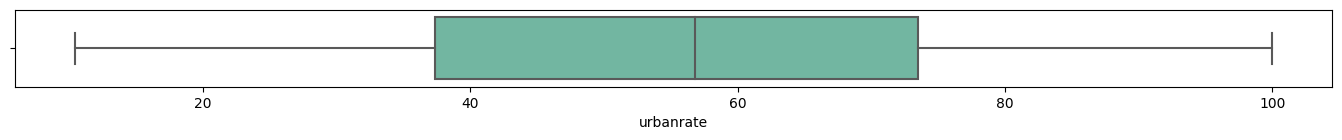

In [33]:
for column in df_quant:
        plt.figure(figsize=(17,1))
        sns.boxplot(data=df_quant, orient="h", palette="Set2", x=column)

## Handling Outliers

In [34]:
for col in df_quant.columns:
  q1 = df_quant[col].quantile(0.25)
  q3 = df_quant[col].quantile(0.75)
  iqr = q3 - q1
  whisker_width = 1.5
  lower_whisker = q1 - (whisker_width * iqr)
  upper_whisker = q3 + whisker_width * iqr
  df_quant[col] = np.where(df_quant[col] > upper_whisker, upper_whisker, np.where(df_quant[col] < lower_whisker, lower_whisker, df_quant[col]))

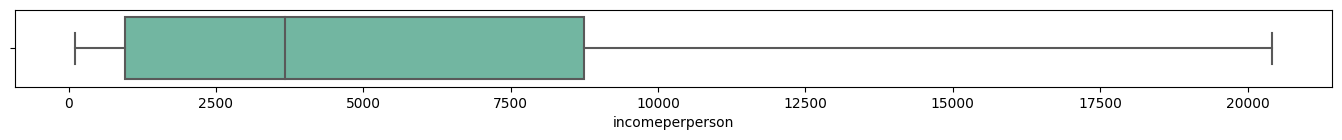

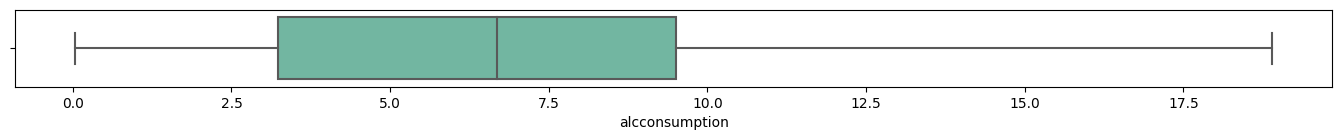

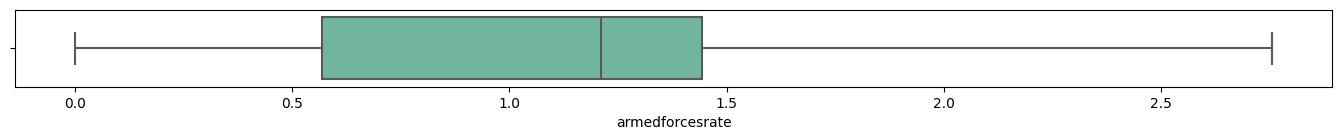

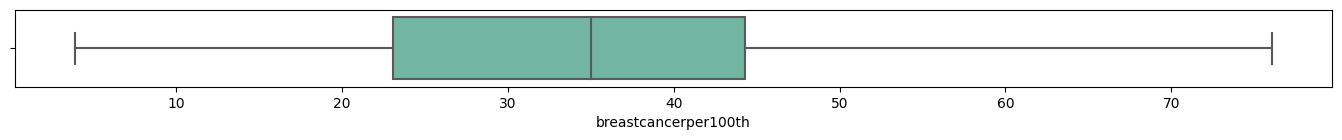

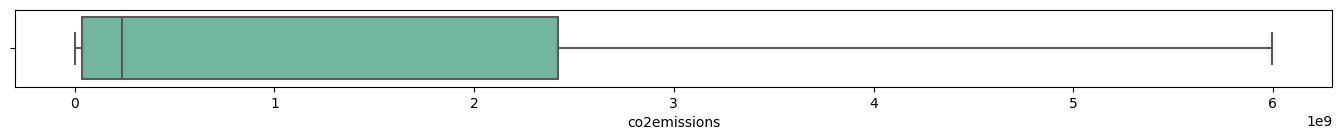

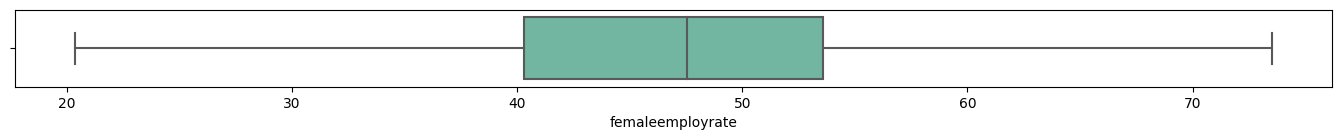

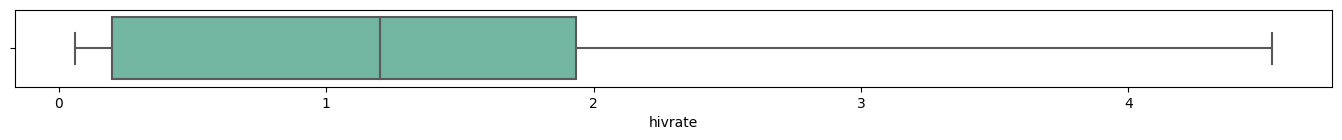

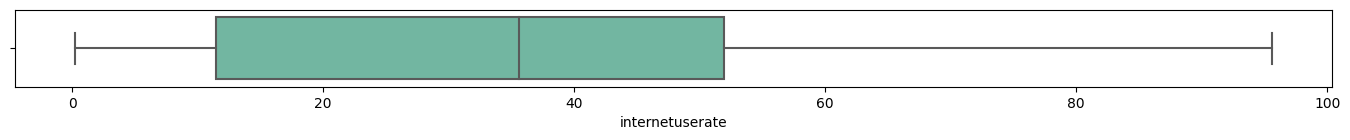

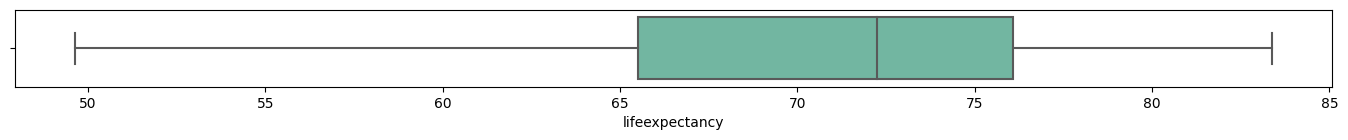

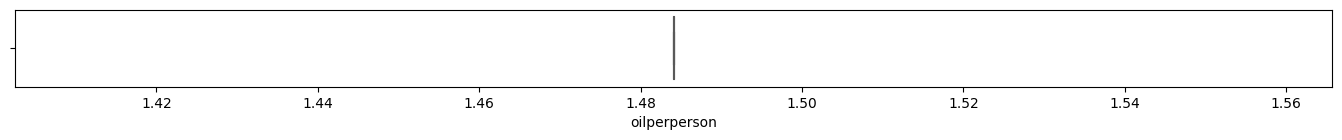

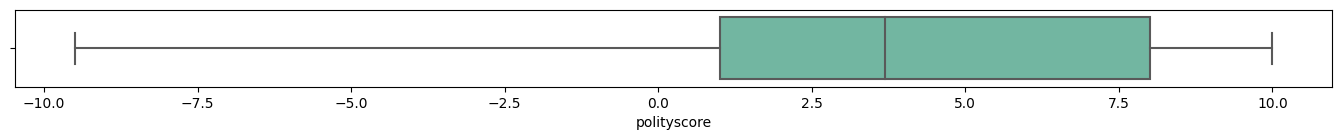

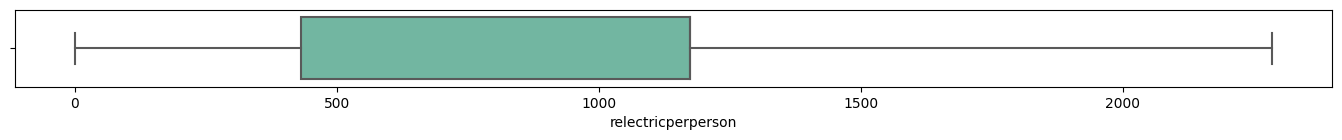

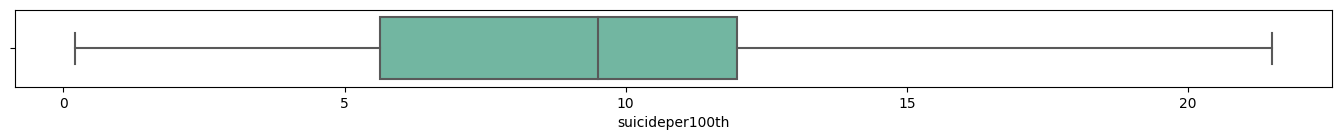

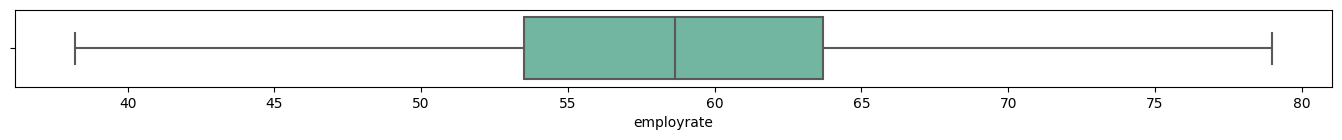

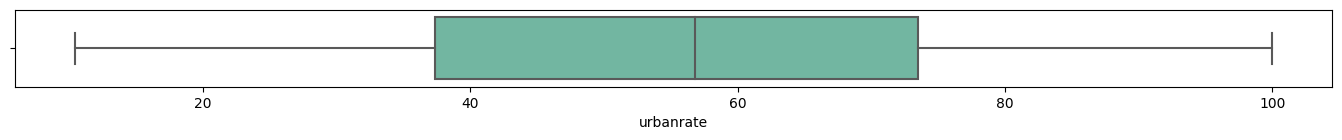

In [35]:
for column in df_quant:
        plt.figure(figsize=(17,1))
        sns.boxplot(data=df_quant, orient="h", palette="Set2", x=column)

## Data Visualizations

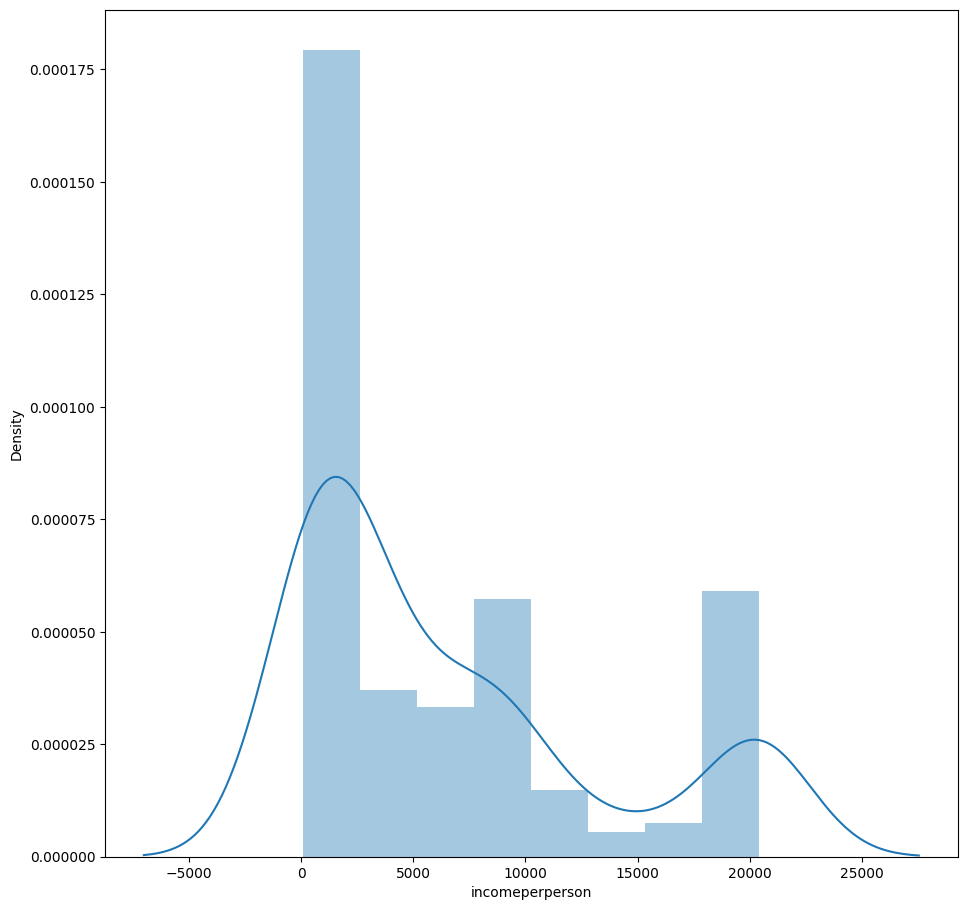

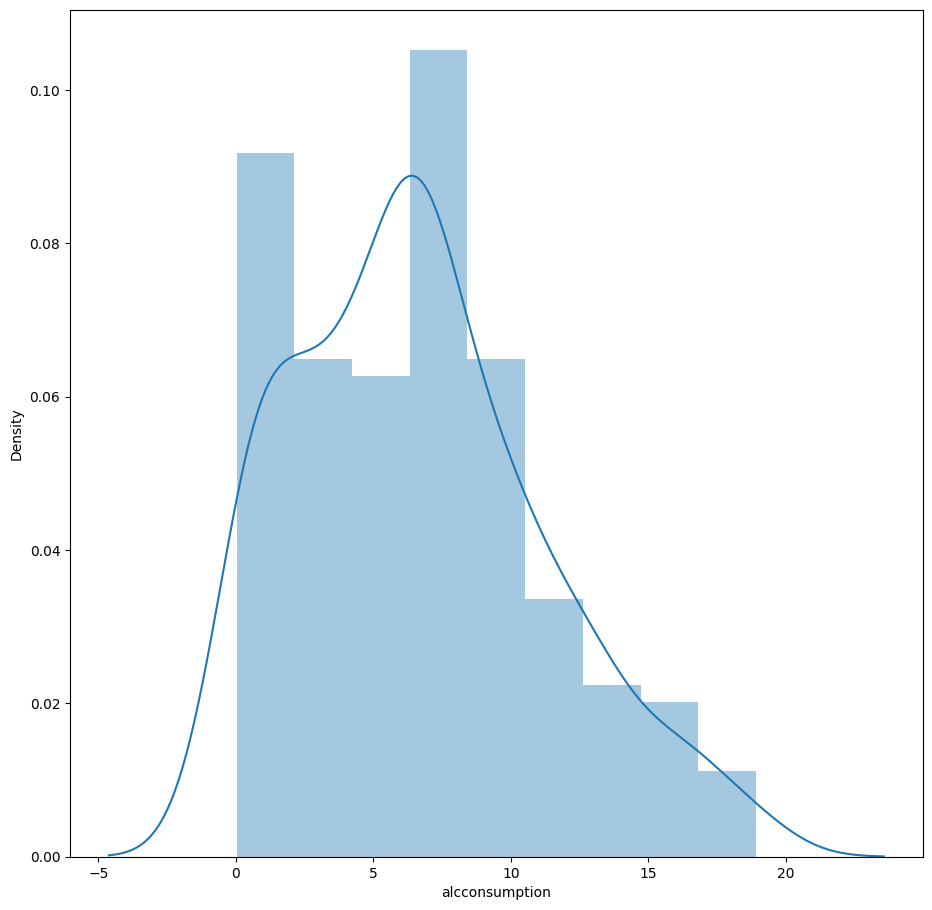

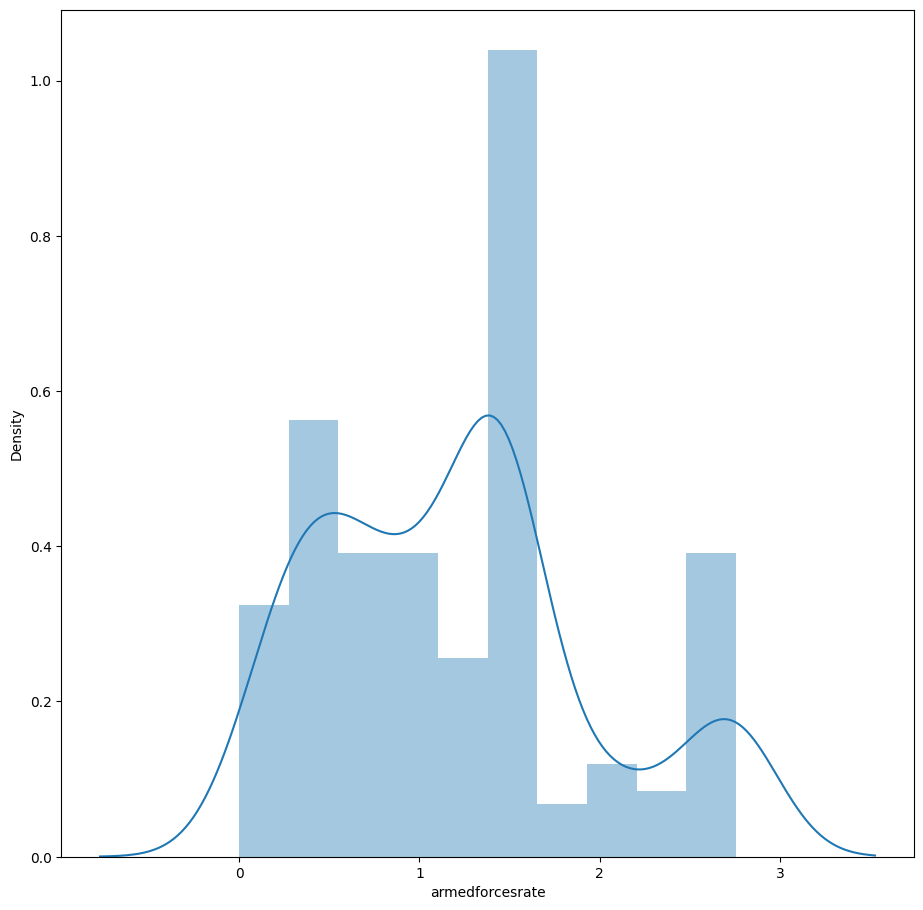

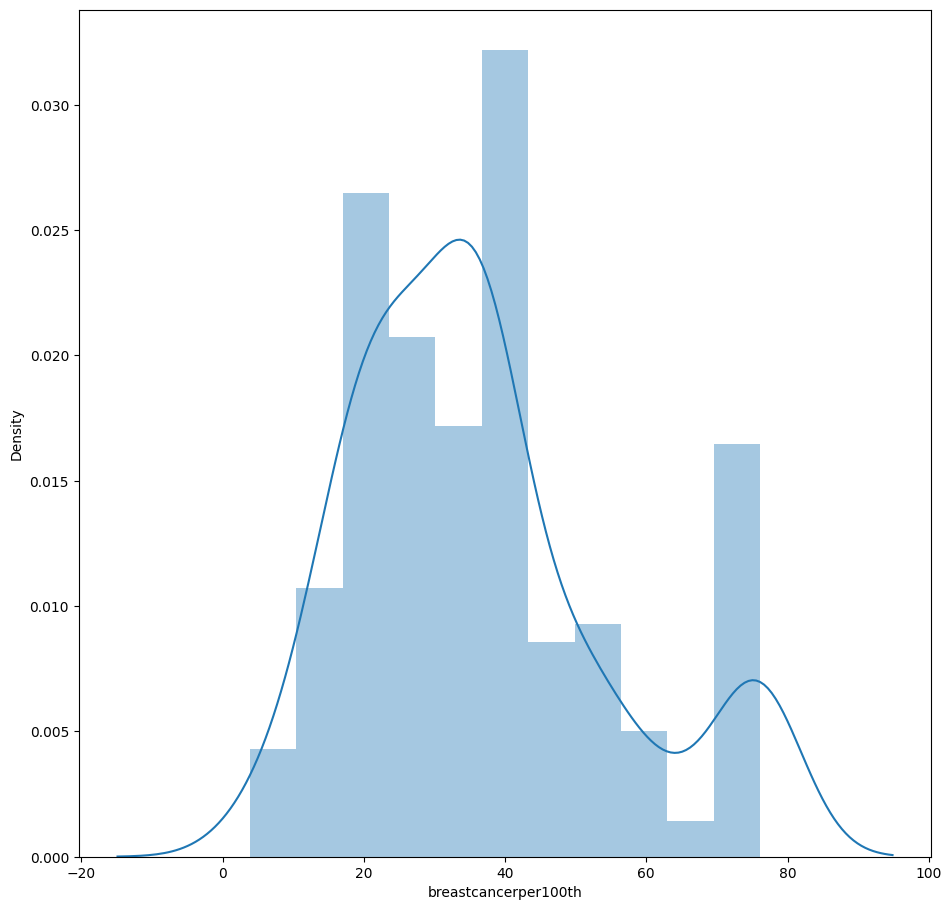

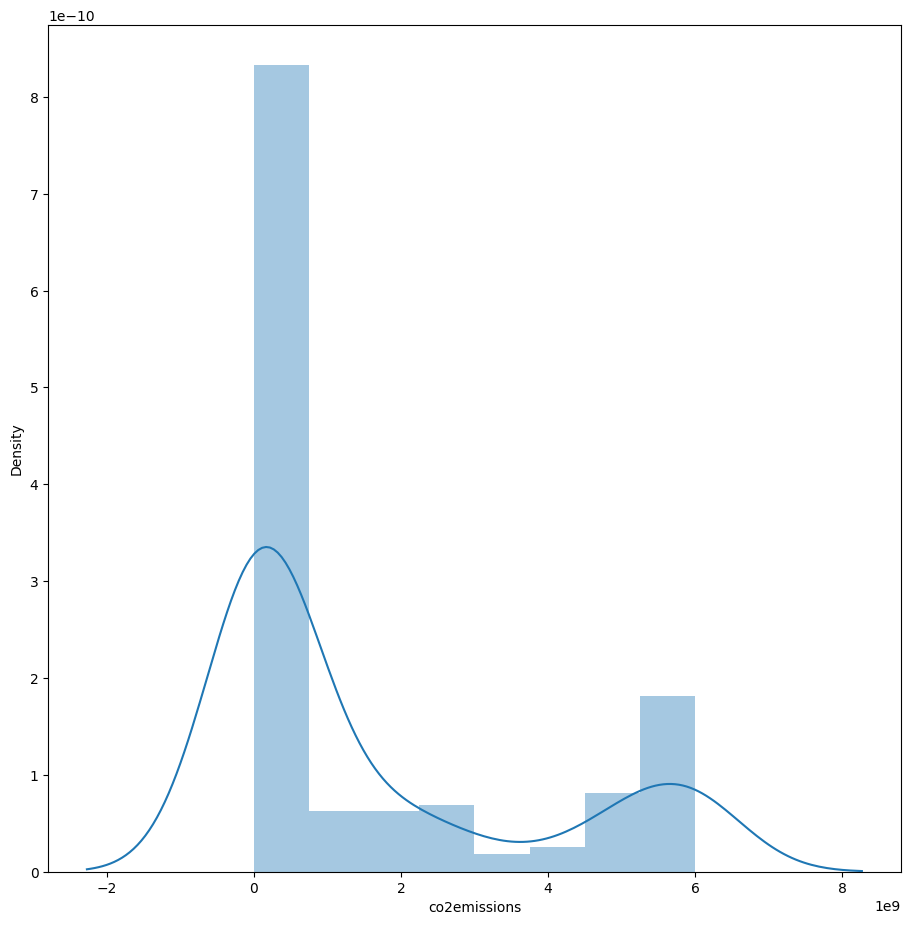

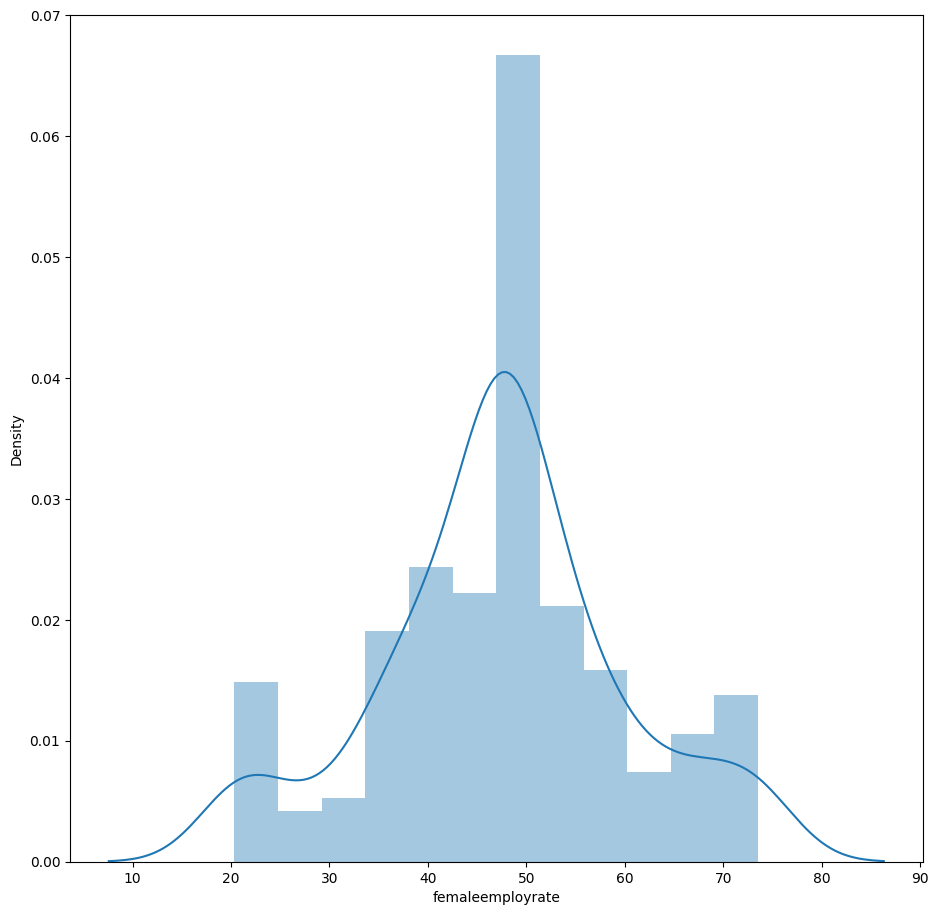

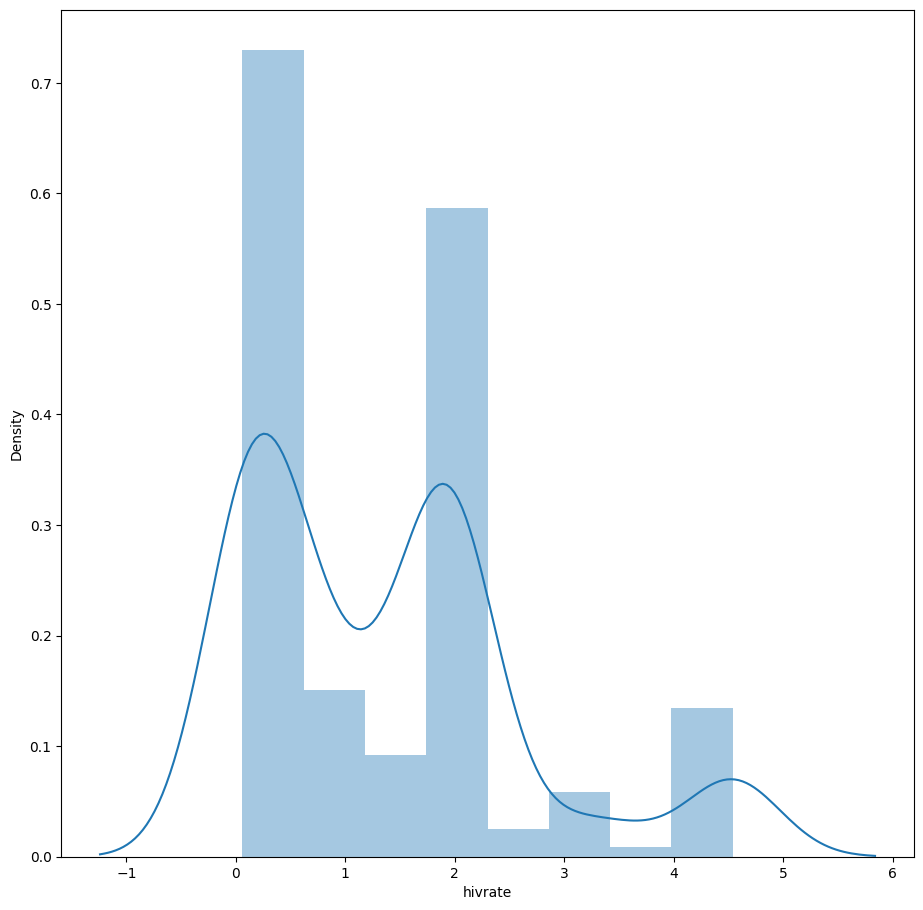

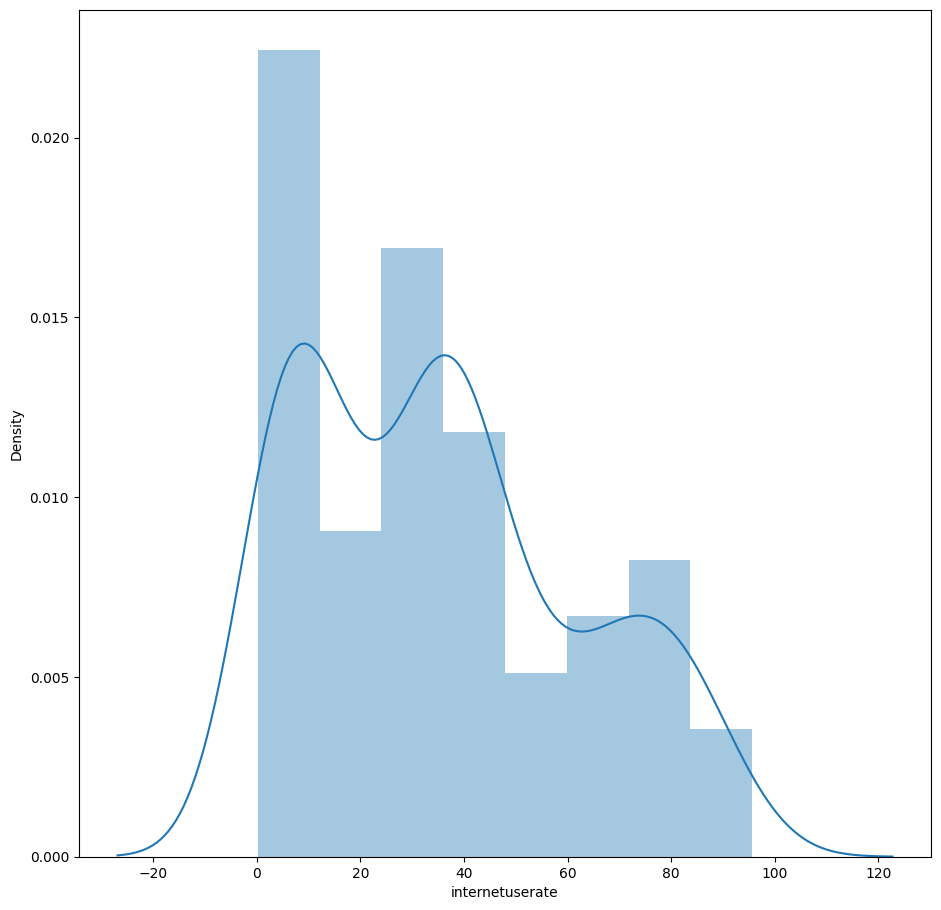

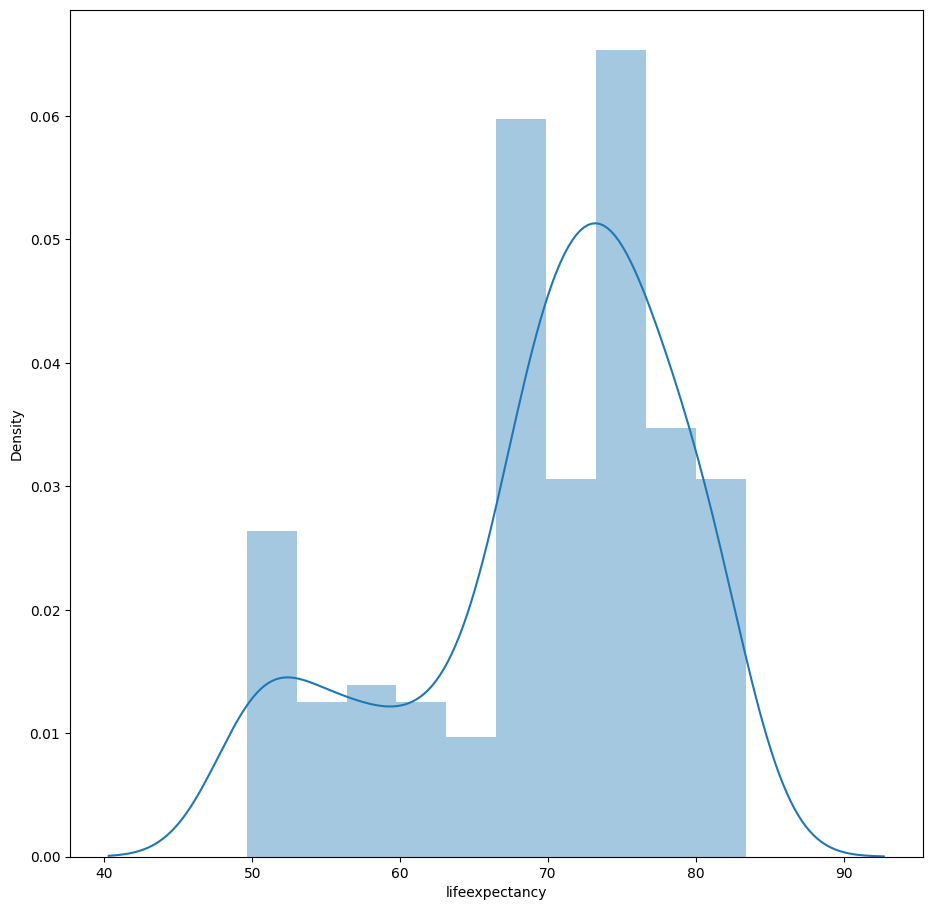

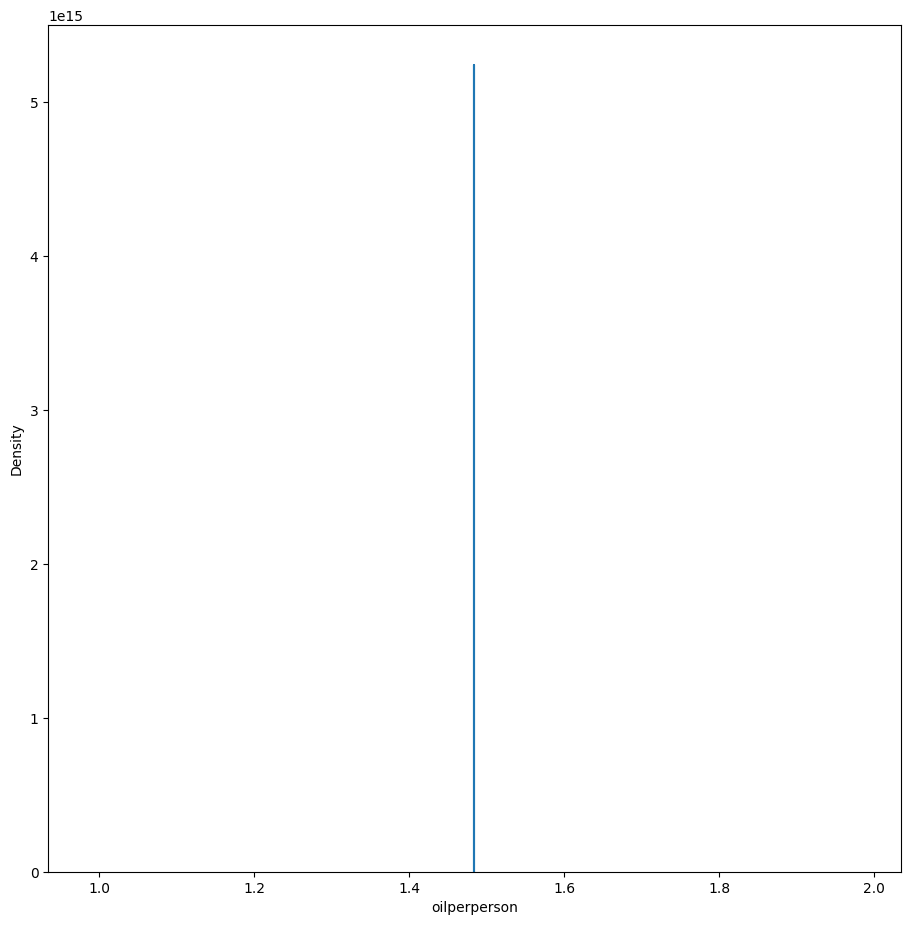

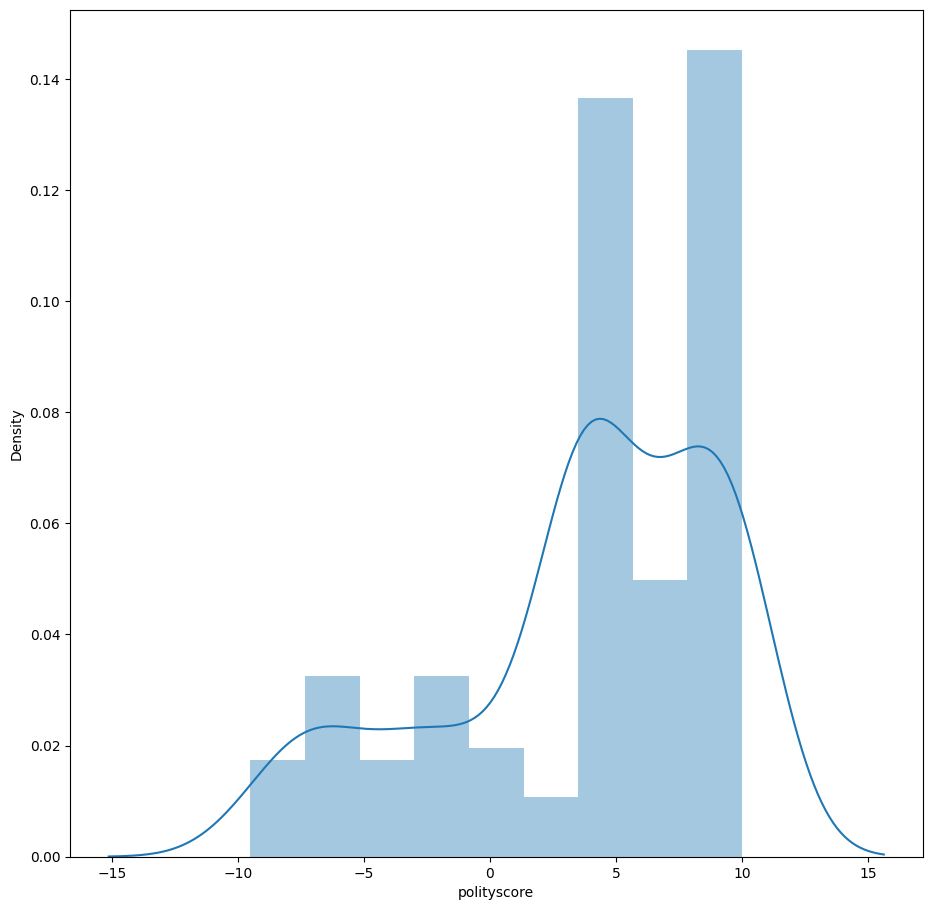

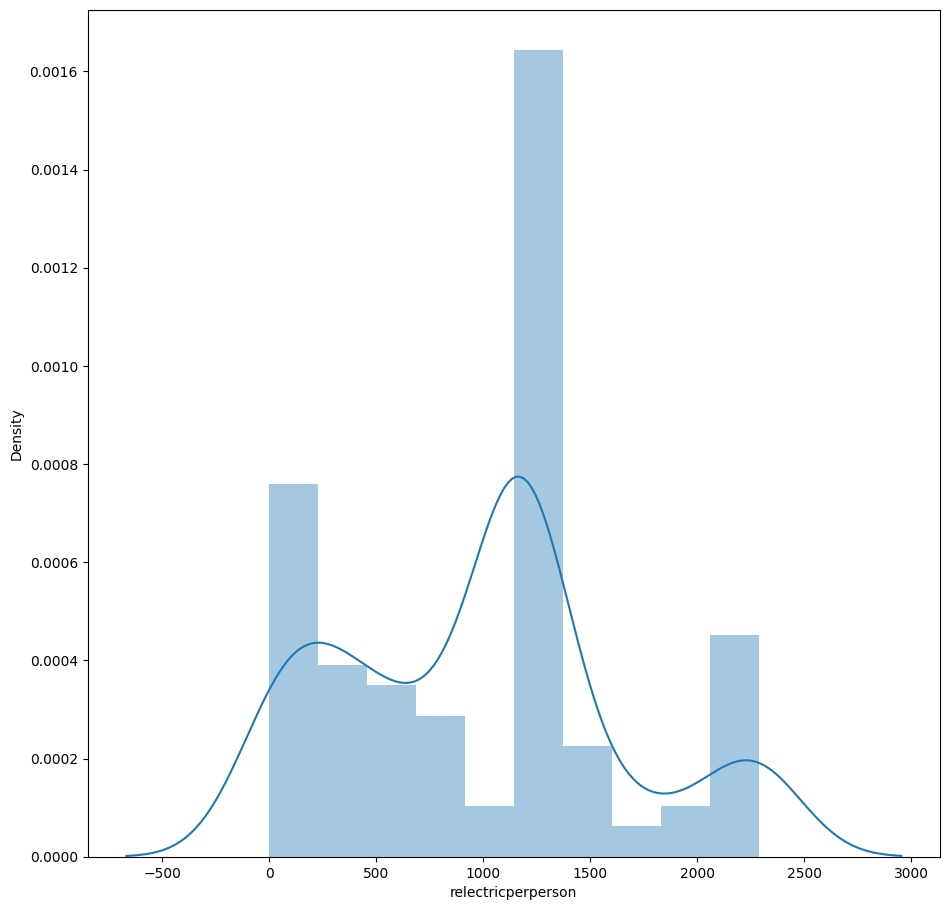

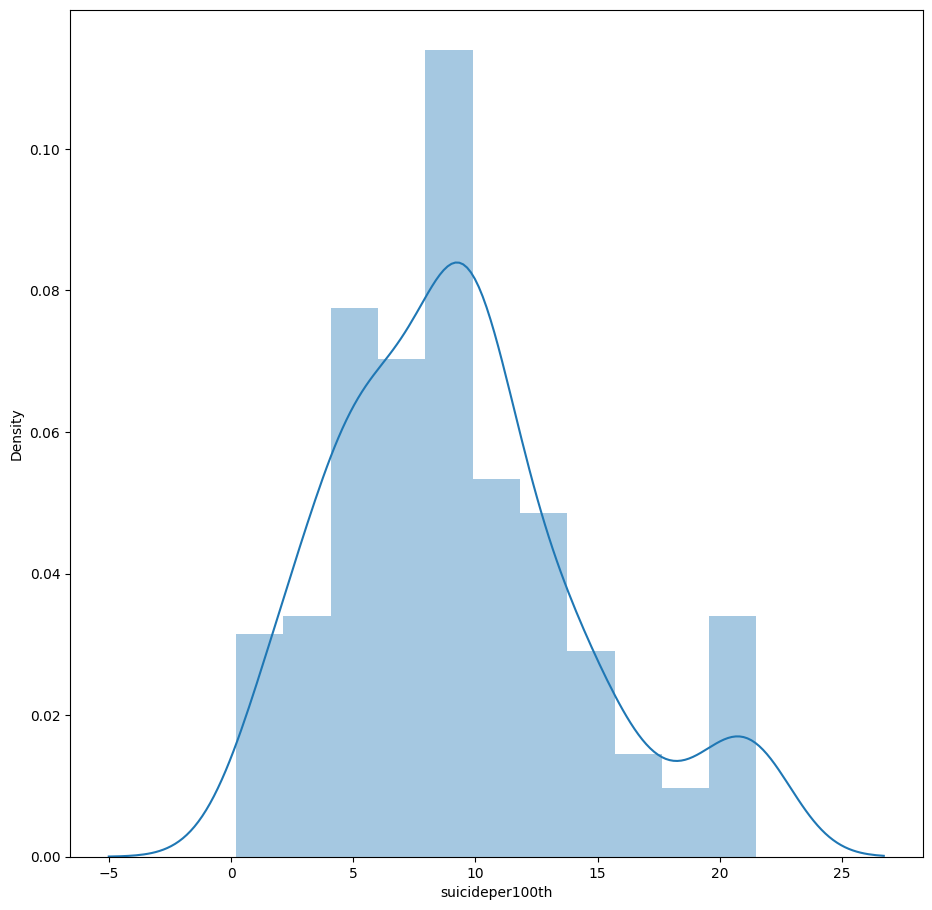

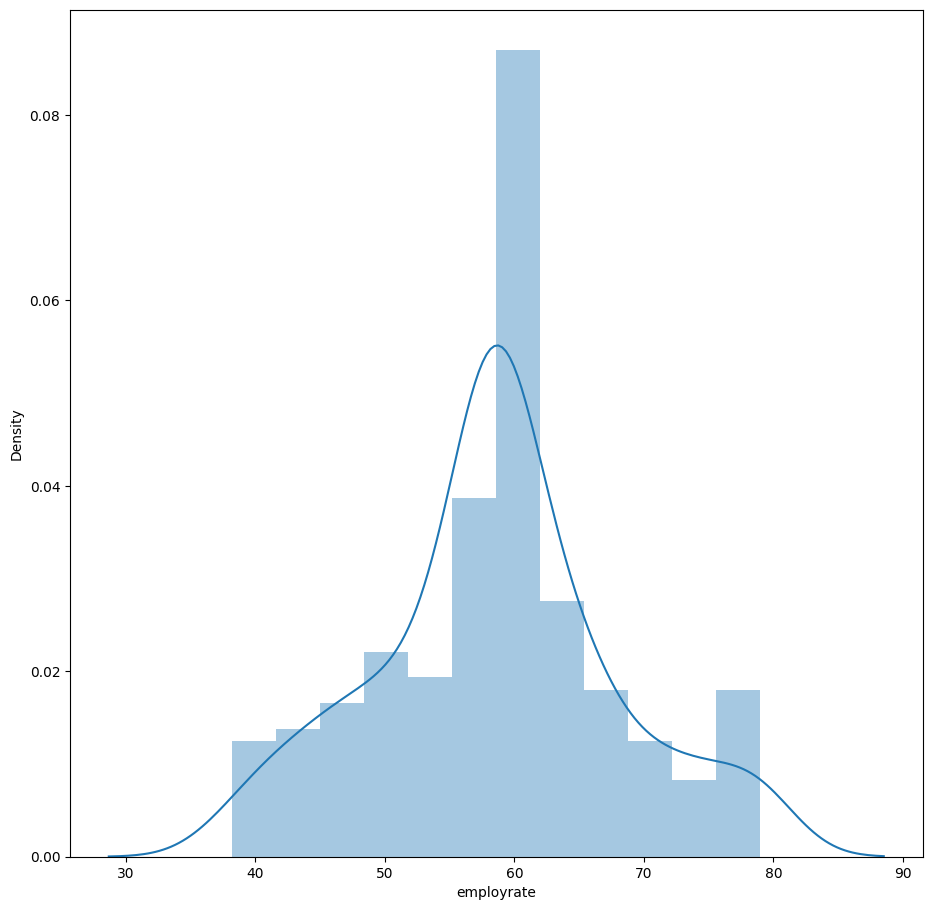

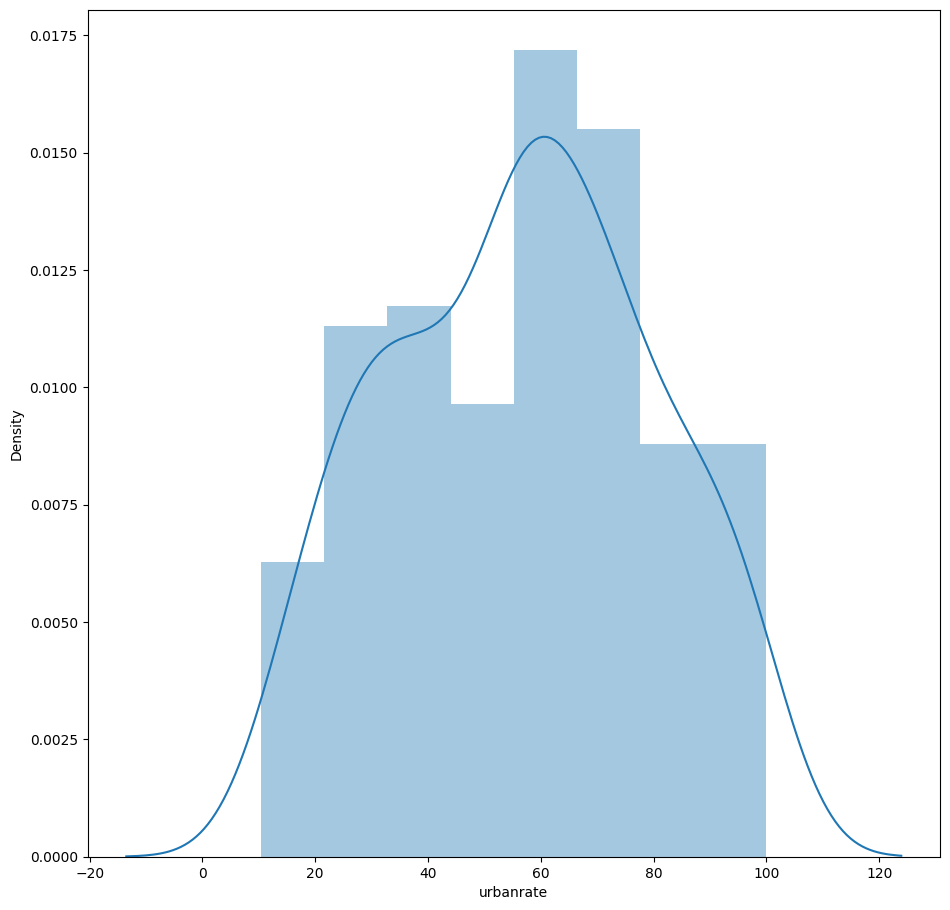

In [36]:
for column in df_quant.columns:
        plt.figure(figsize=(11,11))
        sns.distplot(df_quant[column])

###Choropleth Map (Country Code VS Features)

In [37]:
df.head()

,country,incomeperperson,alcconsumption,armedforcesrate,breastcancerper100th,co2emissions,femaleemployrate,hivrate,internetuserate,lifeexpectancy,oilperperson,polityscore,relectricperperson,suicideper100th,employrate,urbanrate,countrycode
0,Afghanistan,NaN,0.030,0.570,26.800,75944000.000,25.600,NaN,3.654,48.673,NaN,0.000,NaN,6.684,55.700,24.040,AFG
1,Albania,1914.997,7.290,1.025,57.400,223747333.333,42.100,NaN,44.990,76.918,NaN,9.000,636.341,7.699,51.400,46.720,ALB
2,Algeria,2231.993,0.690,2.307,23.500,2932108666.667,31.700,0.100,12.500,73.131,0.420,2.000,590.510,4.849,50.500,65.220,DZA
3,Andorra,21943.340,10.170,NaN,NaN,NaN,NaN,NaN,81.000,NaN,NaN,NaN,NaN,5.362,NaN,88.920,AND
4,Angola,1381.004,5.570,1.461,23.100,248358000.000,69.400,2.000,10.000,51.093,NaN,-2.000,172.999,14.555,75.700,56.700,AGO


## Correlation Analysis

In [51]:
df_quant = df_quant.drop(columns = "oilperperson")

In [52]:
df_quant.head()

,incomeperperson,alcconsumption,armedforcesrate,breastcancerper100th,co2emissions,femaleemployrate,hivrate,internetuserate,lifeexpectancy,polityscore,relectricperperson,suicideper100th,employrate,urbanrate
0,8740.966,0.030,0.570,26.800,75944000.000,25.600,1.935,3.654,49.624,0.000,1173.179,6.684,55.700,24.040
1,1914.997,7.290,1.025,57.400,223747333.333,42.100,1.935,44.990,76.918,9.000,636.341,7.699,51.400,46.720
2,2231.993,0.690,2.307,23.500,2932108666.667,31.700,0.100,12.500,73.131,2.000,590.510,4.849,50.500,65.220
3,20423.174,10.170,1.444,37.403,5033261621.667,47.549,1.935,81.000,69.754,3.689,1173.179,5.362,58.636,88.920
4,1381.004,5.570,1.461,23.100,248358000.000,69.400,2.000,10.000,51.093,-2.000,172.999,14.555,75.700,56.700


<Axes: >

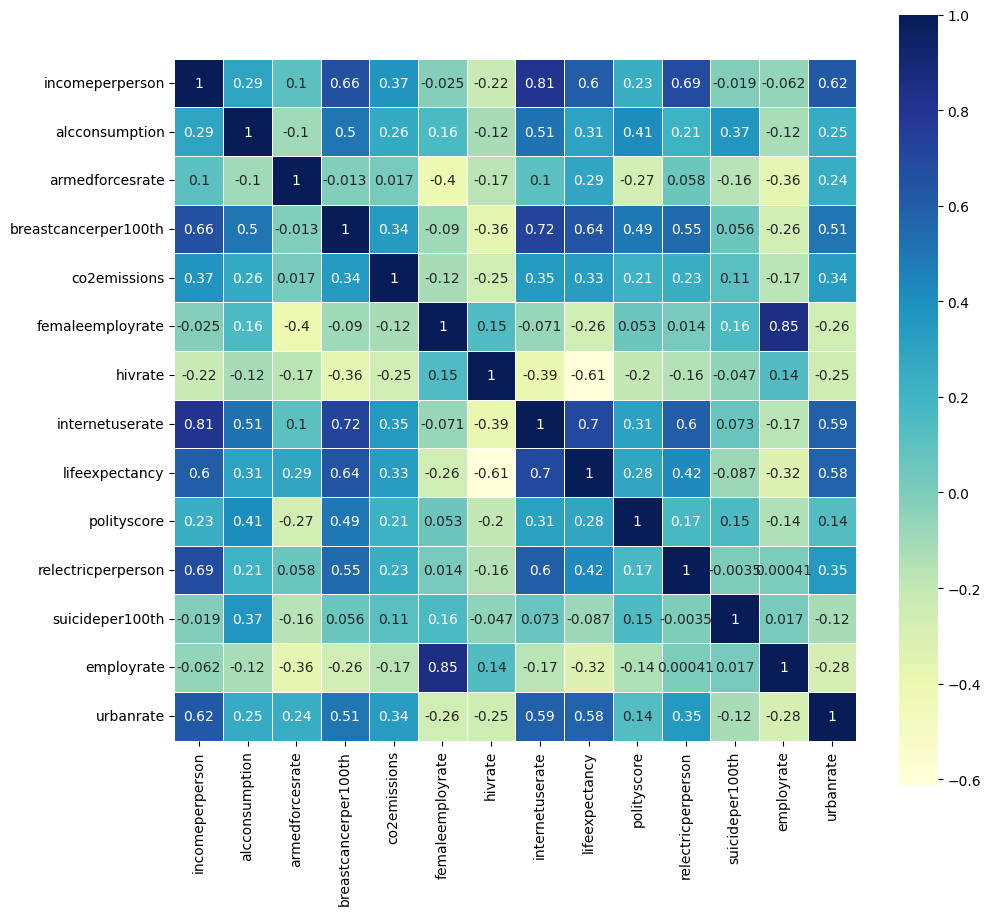

In [53]:
plt.subplots(figsize=(11, 10))
sns.heatmap(df_quant.corr(), annot = True, linewidths = .5, cmap = "YlGnBu", square=True)

#### Sorting Correlated Variables

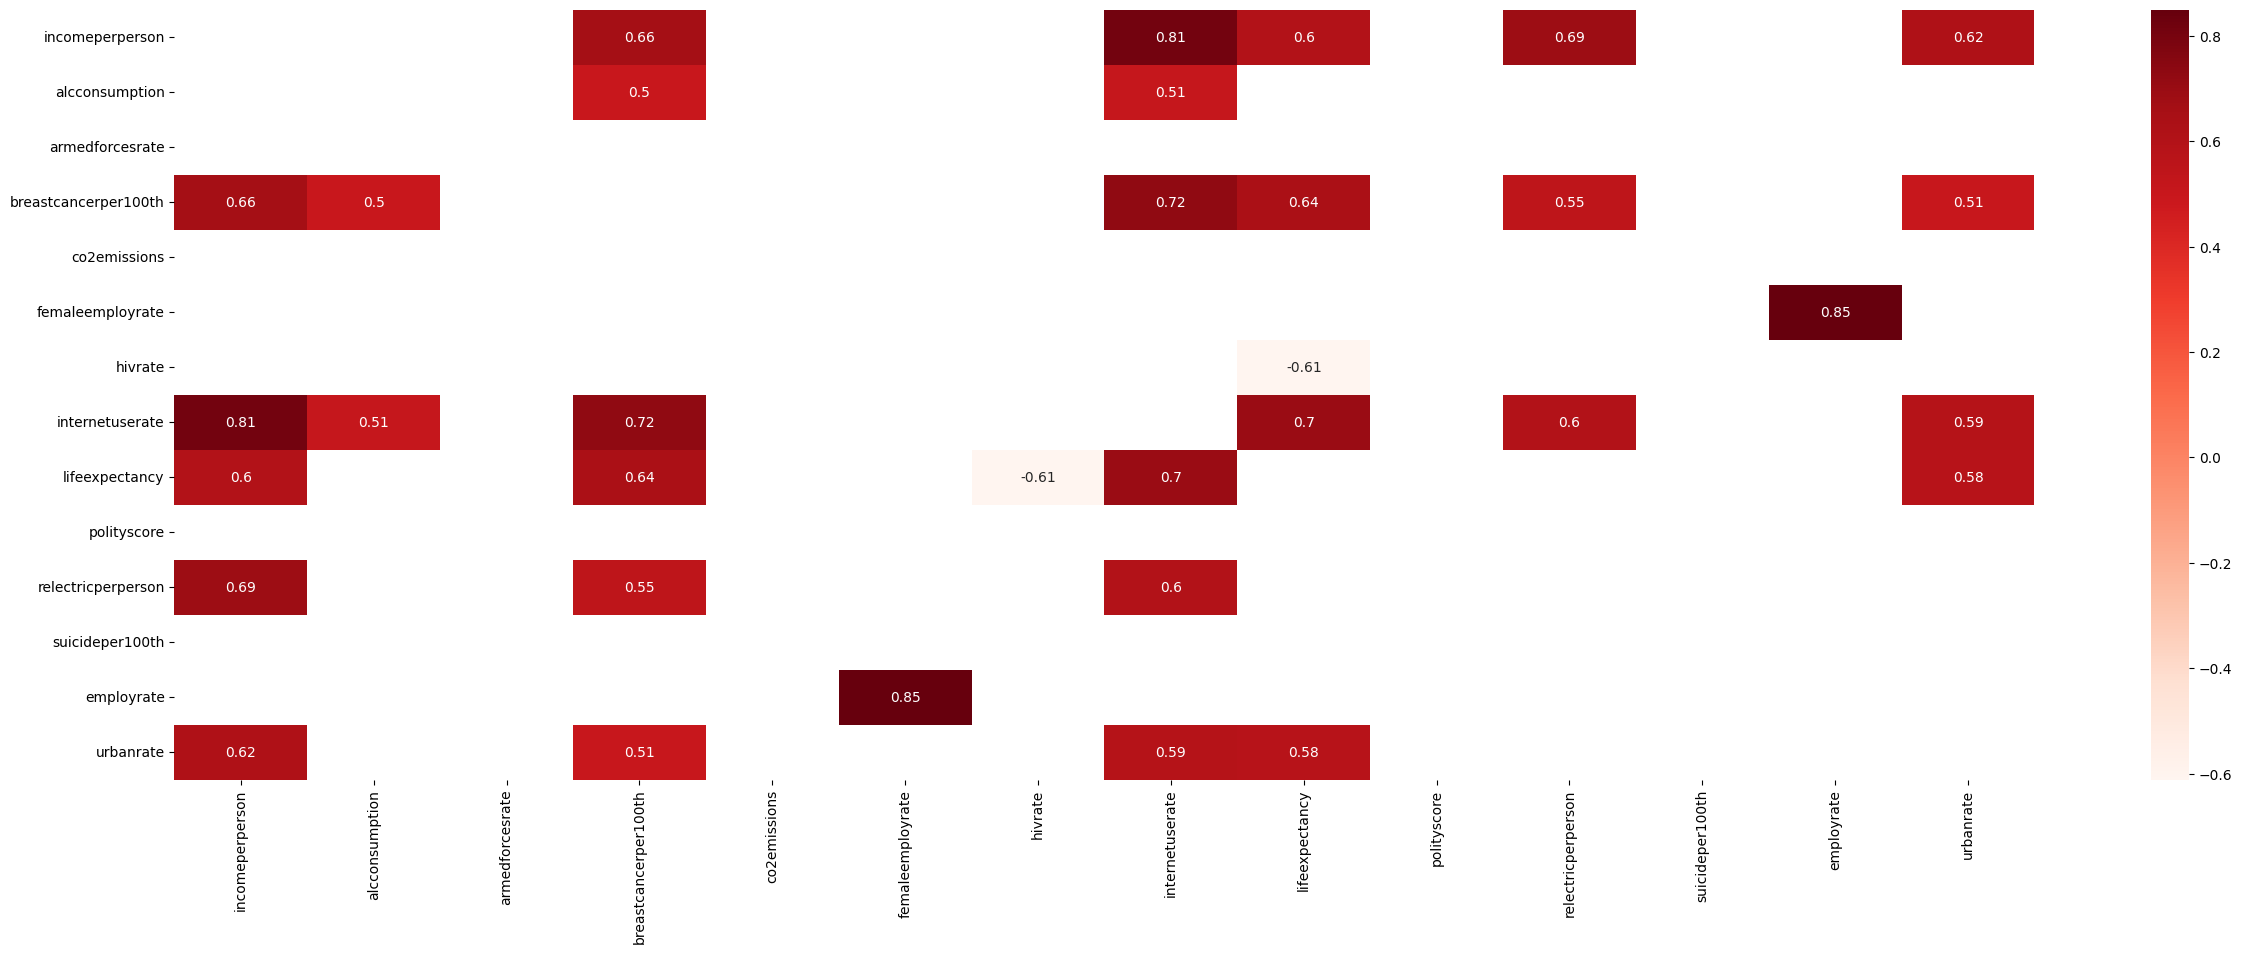

In [54]:
dfCorr = df_quant.corr()
filteredDf = dfCorr[((dfCorr >= .5) | (dfCorr <= -.5)) & (dfCorr !=1.000)]
plt.figure(figsize=(30,10))
sns.heatmap(filteredDf, annot=True, cmap="Reds")
plt.show()

In [55]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
print(get_top_abs_correlations(df_quant, 5))

Top Absolute Correlations
femaleemployrate      employrate           0.850
incomeperperson       internetuserate      0.810
breastcancerper100th  internetuserate      0.725
internetuserate       lifeexpectancy       0.697
incomeperperson       relectricperperson   0.687
dtype: float64


### Correlated Variables Analysis
In general, it is recommended to avoid having correlated features in your dataset. Indeed, a group of highly correlated features will not bring additional information (or just very few), but will increase the complexity of the algorithm, thus increasing the risk of errors. Depending on the features and the model, correlated features might not always harm the performance of the model but that is a real risk.

## findCorrelation: Determine highly correlated variables
This function searches through a correlation matrix and returns a vector of integers corresponding to columns to remove to reduce pair-wise correlations.

The absolute values of pair-wise correlations are considered. If two variables have a high correlation, the function looks at the mean absolute correlation of each variable and removes the variable with the largest mean absolute correlation.

In [56]:
import numpy as np
import pandas as pd

def findCorrelation(corr, cutoff=0.9, exact=None):
    """
    This function is the Python implementation of the R function
    `findCorrelation()`.

    Relies on numpy and pandas, so must have them pre-installed.

    It searches through a correlation matrix and returns a list of column names
    to remove to reduce pairwise correlations.

    For the documentation of the R function, see
    https://www.rdocumentation.org/packages/caret/topics/findCorrelation
    and for the source code of `findCorrelation()`, see
    https://github.com/topepo/caret/blob/master/pkg/caret/R/findCorrelation.R

    -----------------------------------------------------------------------------

    Parameters:
    -----------
    corr: pandas dataframe.
        A correlation matrix as a pandas dataframe.
    cutoff: float, default: 0.9.
        A numeric value for the pairwise absolute correlation cutoff
    exact: bool, default: None
        A boolean value that determines whether the average correlations be
        recomputed at each step
    -----------------------------------------------------------------------------
    Returns:
    --------
    list of column names
    -----------------------------------------------------------------------------
    Example:
    --------
    R1 = pd.DataFrame({
        'x1': [1.0, 0.86, 0.56, 0.32, 0.85],
        'x2': [0.86, 1.0, 0.01, 0.74, 0.32],
        'x3': [0.56, 0.01, 1.0, 0.65, 0.91],
        'x4': [0.32, 0.74, 0.65, 1.0, 0.36],
        'x5': [0.85, 0.32, 0.91, 0.36, 1.0]
    }, index=['x1', 'x2', 'x3', 'x4', 'x5'])

    findCorrelation(R1, cutoff=0.6, exact=False)  # ['x4', 'x5', 'x1', 'x3']
    findCorrelation(R1, cutoff=0.6, exact=True)   # ['x1', 'x5', 'x4']
    """

    def _findCorrelation_fast(corr, avg, cutoff):

        combsAboveCutoff = corr.where(lambda x: (np.tril(x)==0) & (x > cutoff)).stack().index

        rowsToCheck = combsAboveCutoff.get_level_values(0)
        colsToCheck = combsAboveCutoff.get_level_values(1)

        msk = avg[colsToCheck] > avg[rowsToCheck].values
        deletecol = pd.unique(np.r_[colsToCheck[msk], rowsToCheck[~msk]]).tolist()

        return deletecol


    def _findCorrelation_exact(corr, avg, cutoff):

        x = corr.loc[(*[avg.sort_values(ascending=False).index]*2,)]

        if (x.dtypes.values[:, None] == ['int64', 'int32', 'int16', 'int8']).any():
            x = x.astype(float)

        x.values[(*[np.arange(len(x))]*2,)] = np.nan

        deletecol = []
        for ix, i in enumerate(x.columns[:-1]):
            for j in x.columns[ix+1:]:
                if x.loc[i, j] > cutoff:
                    if x[i].mean() > np.nanmean(x.drop(j)):
                        deletecol.append(i)
                        x.loc[i] = x[i] = np.nan
                    else:
                        deletecol.append(j)
                        x.loc[j] = x[j] = np.nan
        return deletecol


    if not np.allclose(corr, corr.T) or any(corr.columns!=corr.index):
        raise ValueError("correlation matrix is not symmetric.")

    acorr = corr.abs()
    avg = acorr.mean()

    if exact or exact is None and corr.shape[1]<100:
        return _findCorrelation_exact(acorr, avg, cutoff)
    else:
        return _findCorrelation_fast(acorr, avg, cutoff)

In [64]:
corr = df_quant.corr()
hc = findCorrelation(corr, cutoff=0.5)
trimm_df = df_quant.drop(columns=hc)
trimm_df.head()

,alcconsumption,armedforcesrate,co2emissions,femaleemployrate,hivrate,polityscore,relectricperperson,suicideper100th,urbanrate,oilperperson
0,0.030,0.570,75944000.000,25.600,1.935,0.000,1173.179,6.684,24.040,1.484
1,7.290,1.025,223747333.333,42.100,1.935,9.000,636.341,7.699,46.720,1.484
2,0.690,2.307,2932108666.667,31.700,0.100,2.000,590.510,4.849,65.220,0.420
3,10.170,1.444,5033261621.667,47.549,1.935,3.689,1173.179,5.362,88.920,1.484
4,5.570,1.461,248358000.000,69.400,2.000,-2.000,172.999,14.555,56.700,1.484


In [65]:
trimm_df.describe()

,alcconsumption,armedforcesrate,co2emissions,femaleemployrate,hivrate,polityscore,relectricperperson,suicideper100th,urbanrate,oilperperson
count,213.000,213.000,213.000,213.000,213.000,213.000,213.000,213.000,213.000,213.000
mean,6.669,1.211,1587879863.451,47.471,1.365,3.694,984.374,9.344,56.769,1.484
std,4.526,0.751,2211029532.989,12.437,1.267,5.474,650.163,5.074,23.276,0.987
min,0.030,0.000,132000.000,20.350,0.060,-9.500,0.000,0.201,10.400,0.032
25%,3.230,0.570,37950000.000,40.300,0.200,1.000,431.625,5.633,37.340,1.484
50%,6.689,1.212,234864666.667,47.549,1.200,3.689,1173.179,9.508,56.769,1.484
75%,9.500,1.444,2421917666.667,53.600,1.935,8.000,1173.179,11.980,73.500,1.484
max,18.905,2.756,5997869166.667,73.550,4.539,10.000,2285.509,21.501,100.000,12.229


### Generating Cleaned Dataframe

In [59]:
df["oilperperson"] = df["oilperperson"].fillna(df["oilperperson"].mean())
df["oilperperson"].value_counts()

1.484    150
0.420      1
0.891      1
0.771      1
2.998      1
        ... 
1.163      1
1.700      1
1.207      1
1.593      1
1.215      1
Name: oilperperson, Length: 64, dtype: int64

In [60]:
df_quant["oilperperson"] = df["oilperperson"]
df_quant.head()

,incomeperperson,alcconsumption,armedforcesrate,breastcancerper100th,co2emissions,femaleemployrate,hivrate,internetuserate,lifeexpectancy,polityscore,relectricperperson,suicideper100th,employrate,urbanrate,oilperperson
0,8740.966,0.030,0.570,26.800,75944000.000,25.600,1.935,3.654,49.624,0.000,1173.179,6.684,55.700,24.040,1.484
1,1914.997,7.290,1.025,57.400,223747333.333,42.100,1.935,44.990,76.918,9.000,636.341,7.699,51.400,46.720,1.484
2,2231.993,0.690,2.307,23.500,2932108666.667,31.700,0.100,12.500,73.131,2.000,590.510,4.849,50.500,65.220,0.420
3,20423.174,10.170,1.444,37.403,5033261621.667,47.549,1.935,81.000,69.754,3.689,1173.179,5.362,58.636,88.920,1.484
4,1381.004,5.570,1.461,23.100,248358000.000,69.400,2.000,10.000,51.093,-2.000,172.999,14.555,75.700,56.700,1.484


In [61]:
data = pd.concat([df_quant, df_qual], axis = 1)
data.head()

,incomeperperson,alcconsumption,armedforcesrate,breastcancerper100th,co2emissions,femaleemployrate,hivrate,internetuserate,lifeexpectancy,polityscore,relectricperperson,suicideper100th,employrate,urbanrate,oilperperson,country,countrycode
0,8740.966,0.030,0.570,26.800,75944000.000,25.600,1.935,3.654,49.624,0.000,1173.179,6.684,55.700,24.040,1.484,Afghanistan,AFG
1,1914.997,7.290,1.025,57.400,223747333.333,42.100,1.935,44.990,76.918,9.000,636.341,7.699,51.400,46.720,1.484,Albania,ALB
2,2231.993,0.690,2.307,23.500,2932108666.667,31.700,0.100,12.500,73.131,2.000,590.510,4.849,50.500,65.220,0.420,Algeria,DZA
3,20423.174,10.170,1.444,37.403,5033261621.667,47.549,1.935,81.000,69.754,3.689,1173.179,5.362,58.636,88.920,1.484,Andorra,AND
4,1381.004,5.570,1.461,23.100,248358000.000,69.400,2.000,10.000,51.093,-2.000,172.999,14.555,75.700,56.700,1.484,Angola,AGO


In [62]:
data.to_csv(r"/content/dataframe.csv", index = False)